In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
try:
    df_raw = pd.read_csv('../data/dataset_saude_brasil.csv', sep=',')
    print("Arquivo carregado com sucesso!")

except FileNotFoundError:
    print("Erro: O arquivo 'dataset_saude_brasil.csv' não foi encontrado no diretório 'data/'.")
    
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Arquivo carregado com sucesso!


In [3]:
df_raw.head()

ID  Idade       Sexo   IMC Passos_Diarios  Horas_Sono  Agua_Litros  \
0   1   69.0  Masculino  29.1        15604.0         7.4          0.9   
1   2   32.0   Feminino  22.3         9607.0         7.6          1.9   
2   3   89.0  Masculino  25.6         4160.0         6.7          2.3   
3   4   78.0   Feminino  35.3         3569.0         6.9          0.7   
4   5   38.0  Masculino   NaN        13174.0         8.2          1.1   

  Calorias Fumante    Alcool  Horas_Trabalho  Frequencia_Cardiaca_Repouso  \
0   1297.0     Não  Moderado               8                           86   
1   3529.0     Não  Moderado              12                           54   
2   4399.0     Não  Moderado              10                           75   
3   1595.0     Não     Baixo               9                           92   
4   1635.0     Não     Baixo              12                           73   

   Pressao_Sistolica  Pressao_Diastolica Colesterol Historico_Familiar  \
0                123                  95      225.0                Não   
1                140                  85      222.0                Sim   
2                110                  60      131.0                Sim   
3                167                 117      199.0                Não   
4                105                  77      266.0                Sim   

  Risco_Doenca  
0        Baixo  
1        Baixo  
2     Moderado  
3         Alto  
4     Moderado

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           20000 non-null  int64  
 1   Idade                        19651 non-null  float64
 2   Sexo                         20000 non-null  object 
 3   IMC                          19650 non-null  float64
 4   Passos_Diarios               19801 non-null  object 
 5   Horas_Sono                   20000 non-null  float64
 6   Agua_Litros                  20000 non-null  float64
 7   Calorias                     19800 non-null  object 
 8   Fumante                      20000 non-null  object 
 9   Alcool                       20000 non-null  object 
 10  Horas_Trabalho               20000 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  20000 non-null  int64  
 12  Pressao_Sistolica            20000 non-null  int64  
 13  Pressao_Diastoli

In [5]:
df_raw.isnull().sum()

ID                               0
Idade                          349
Sexo                             0
IMC                            350
Passos_Diarios                 199
Horas_Sono                       0
Agua_Litros                      0
Calorias                       200
Fumante                          0
Alcool                           0
Horas_Trabalho                   0
Frequencia_Cardiaca_Repouso      0
Pressao_Sistolica                0
Pressao_Diastolica               0
Colesterol                     199
Historico_Familiar               0
Risco_Doenca                     0
dtype: int64

In [6]:
df_raw.shape

(20000, 17)

In [7]:
duplicados_id = df_raw[df_raw['ID'].duplicated(keep=False)]
print("\nLinhas com valores duplicados na coluna 'ID':")
print(duplicados_id)


Linhas com valores duplicados na coluna 'ID':
Empty DataFrame
Columns: [ID, Idade, Sexo, IMC, Passos_Diarios, Horas_Sono, Agua_Litros, Calorias, Fumante, Alcool, Horas_Trabalho, Frequencia_Cardiaca_Repouso, Pressao_Sistolica, Pressao_Diastolica, Colesterol, Historico_Familiar, Risco_Doenca]
Index: []


In [8]:
df_clean = df_raw.dropna()

In [9]:
df_clean.shape

(18740, 17)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18740 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18740 non-null  int64  
 1   Idade                        18740 non-null  float64
 2   Sexo                         18740 non-null  object 
 3   IMC                          18740 non-null  float64
 4   Passos_Diarios               18740 non-null  object 
 5   Horas_Sono                   18740 non-null  float64
 6   Agua_Litros                  18740 non-null  float64
 7   Calorias                     18740 non-null  object 
 8   Fumante                      18740 non-null  object 
 9   Alcool                       18740 non-null  object 
 10  Horas_Trabalho               18740 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  18740 non-null  int64  
 12  Pressao_Sistolica            18740 non-null  int64  
 13  Pressao_Diastolica   

In [11]:
df_clean["Calorias"] = pd.to_numeric(df_clean["Calorias"], errors="coerce")
df_clean["Colesterol"] = pd.to_numeric(df_clean["Colesterol"], errors="coerce")
df_clean["Passos_Diarios"] = pd.to_numeric(df_clean["Passos_Diarios"], errors="coerce")

C:\Users\MrTatsch\AppData\Local\Temp\ipykernel_18156\673049893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Calorias"] = pd.to_numeric(df_clean["Calorias"], errors="coerce")
C:\Users\MrTatsch\AppData\Local\Temp\ipykernel_18156\673049893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Colesterol"] = pd.to_numeric(df_clean["Colesterol"], errors="coerce")
C:\Users\MrTatsch\AppData\Local\Temp\ipykernel_18156\673049893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [12]:
display(df_clean[["Passos_Diarios","Calorias", "Colesterol"]].isna().sum())

Passos_Diarios    145
Calorias          145
Colesterol        140
dtype: int64

In [13]:
df_clean = df_clean.dropna()

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18313 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18313 non-null  int64  
 1   Idade                        18313 non-null  float64
 2   Sexo                         18313 non-null  object 
 3   IMC                          18313 non-null  float64
 4   Passos_Diarios               18313 non-null  float64
 5   Horas_Sono                   18313 non-null  float64
 6   Agua_Litros                  18313 non-null  float64
 7   Calorias                     18313 non-null  float64
 8   Fumante                      18313 non-null  object 
 9   Alcool                       18313 non-null  object 
 10  Horas_Trabalho               18313 non-null  int64  
 11  Frequencia_Cardiaca_Repouso  18313 non-null  int64  
 12  Pressao_Sistolica            18313 non-null  int64  
 13  Pressao_Diastolica   

In [15]:
df_clean = df_clean.drop(columns=["ID"], errors="ignore")

In [16]:
colunas_quantitativas = df_clean.select_dtypes(include=np.number).columns.tolist()

In [17]:
print("--- Colunas Quantitativas (Numéricas) ---")
print(colunas_quantitativas)

--- Colunas Quantitativas (Numéricas) ---
['Idade', 'IMC', 'Passos_Diarios', 'Horas_Sono', 'Agua_Litros', 'Calorias', 'Horas_Trabalho', 'Frequencia_Cardiaca_Repouso', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Colesterol']


In [18]:
colunas_qualitativas = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

In [19]:
print("--- Colunas Qualitativas (Categóricas) ---")
print(colunas_qualitativas)

--- Colunas Qualitativas (Categóricas) ---
['Sexo', 'Fumante', 'Alcool', 'Historico_Familiar', 'Risco_Doenca']


In [20]:
for categoria in colunas_qualitativas:
    print(f"\nColuna: {categoria}")
    print(df_clean[categoria].unique())


Coluna: Sexo
['Masculino' 'Feminino']

Coluna: Fumante
['Não' 'Sim']

Coluna: Alcool
['Moderado' 'Baixo' 'Alto']

Coluna: Historico_Familiar
['Não' 'Sim']

Coluna: Risco_Doenca
['Baixo' 'Moderado' 'Alto' 'Muito Alto']


# Análise 

In [22]:
df_clean[colunas_quantitativas].describe().T

count          mean          std     min  \
Idade                        18313.0     53.465462    20.759772    18.0   
IMC                          18313.0     24.981975     4.991810     2.7   
Passos_Diarios               18313.0  10526.377491  5454.005451  1000.0   
Horas_Sono                   18313.0      7.003380     1.506376     1.1   
Agua_Litros                  18313.0      1.998203     0.704767    -0.7   
Calorias                     18313.0   3288.315732  1976.150638  1200.0   
Horas_Trabalho               18313.0      8.505543     2.857601     4.0   
Frequencia_Cardiaca_Repouso  18313.0     74.536832    14.516828    50.0   
Pressao_Sistolica            18313.0    134.625894    26.064592    90.0   
Pressao_Diastolica           18313.0     89.557637    17.322137    60.0   
Colesterol                   18313.0    212.279037    58.816857   120.0   

                                25%      50%      75%      max  
Idade                          35.0     53.0     71.0     89.0  
IMC                            21.6     25.0     28.3     45.5  
Passos_Diarios               5840.0  10527.0  15235.0  19999.0  
Horas_Sono                      6.0      7.0      8.0     13.2  
Agua_Litros                     1.5      2.0      2.5      4.7  
Calorias                     2156.0   3134.0   4110.0  24970.0  
Horas_Trabalho                  6.0      9.0     11.0     13.0  
Frequencia_Cardiaca_Repouso    62.0     75.0     87.0     99.0  
Pressao_Sistolica             112.0    135.0    157.0    179.0  
Pressao_Diastolica             75.0     90.0    104.0    119.0  
Colesterol                    164.0    211.0    257.0    598.0

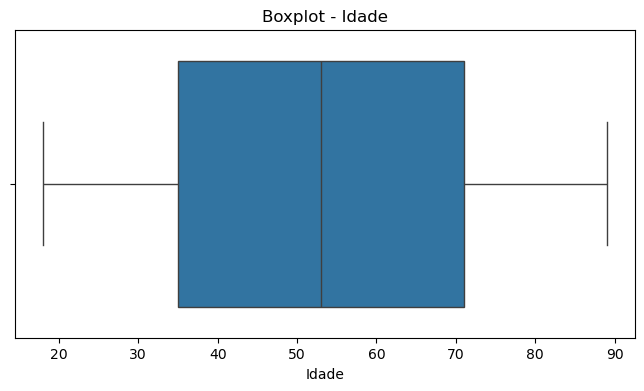

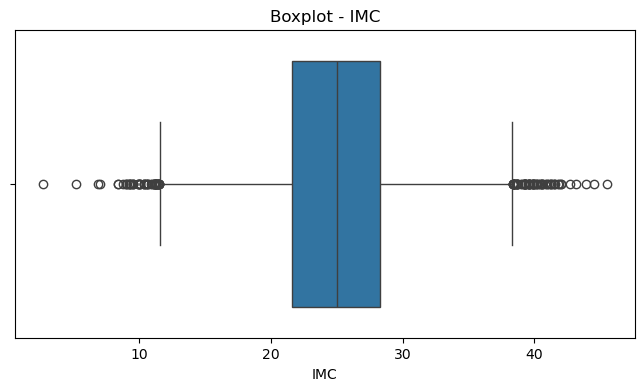

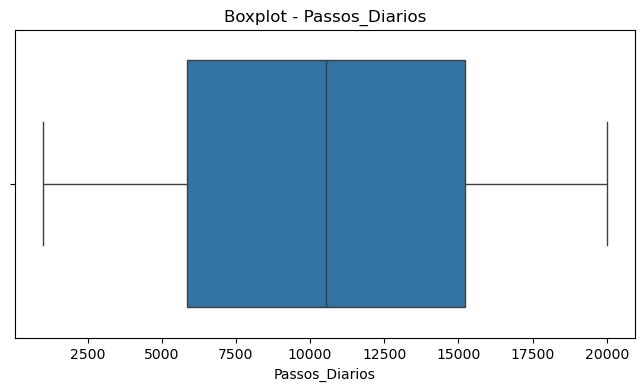

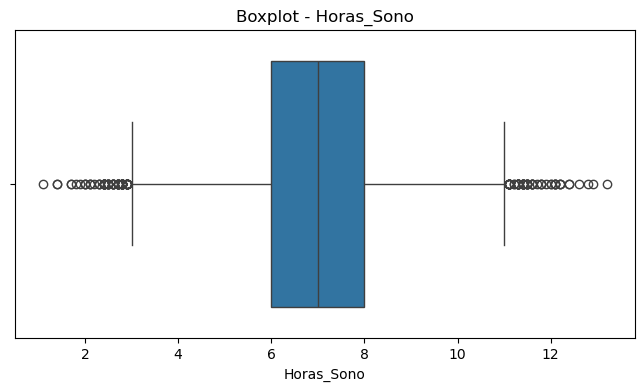

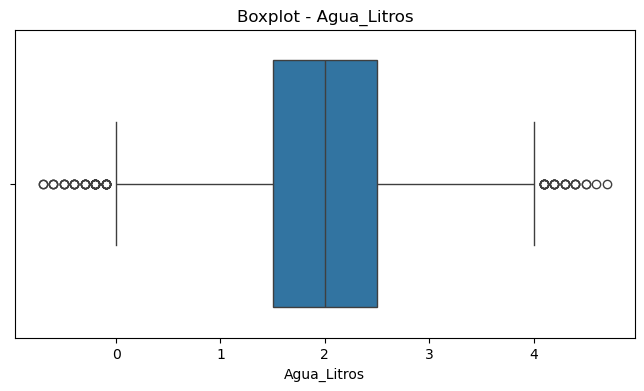

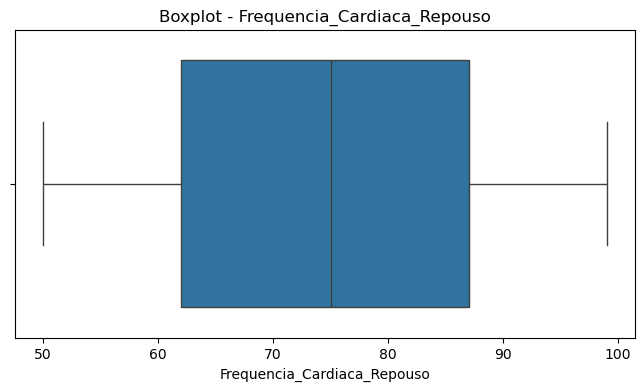

In [46]:
# Selecionar apenas as colunas numéricas
colunas_numericas = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Criar boxplots para cada variável numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[coluna])
    plt.title(f"Boxplot - {coluna}")
    plt.show()

# Análise Bivariada

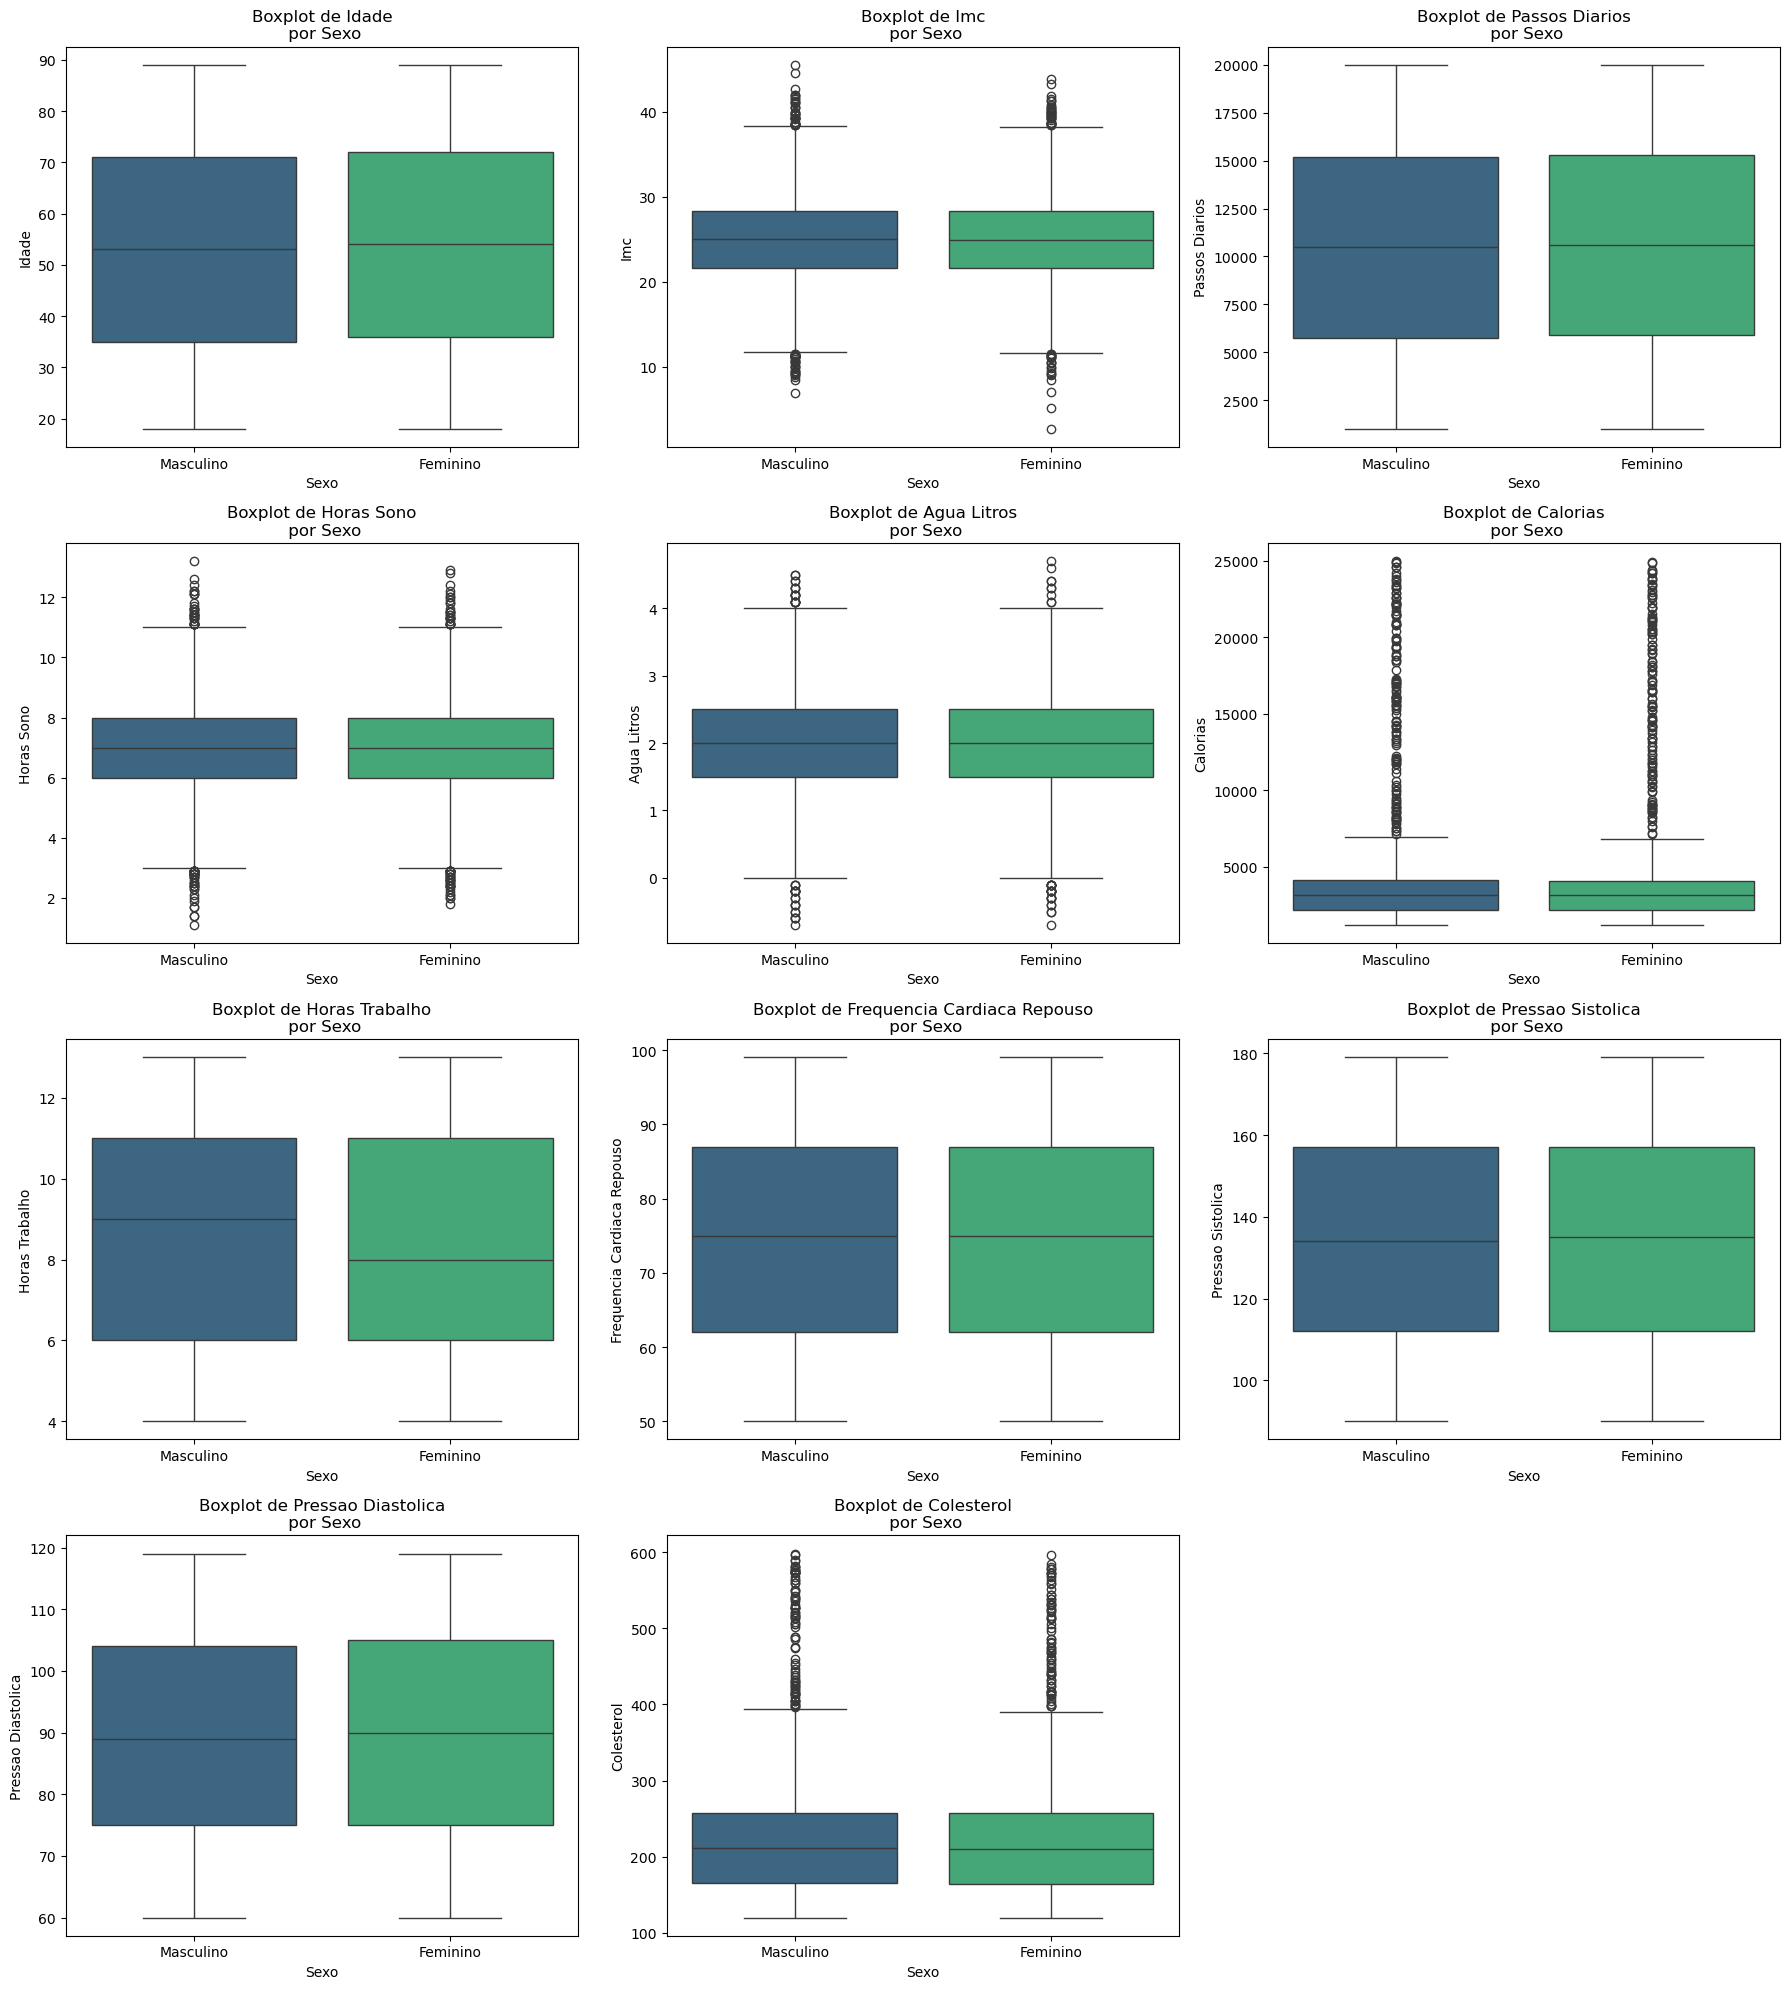

In [44]:
n_cols = 3
n_rows = (len(colunas_numericas) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(data=df_clean, x='Sexo', y=coluna, ax=axes[i], hue='Sexo', palette='viridis')
    
    axes[i].set_title(f'Boxplot de {coluna.replace("_", " ").title()}\n por Sexo', fontsize=12)
    axes[i].set_xlabel('Sexo')
    axes[i].set_ylabel(coluna.replace("_", " ").title())

for i in range(len(colunas_numericas), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Análise Multivariada

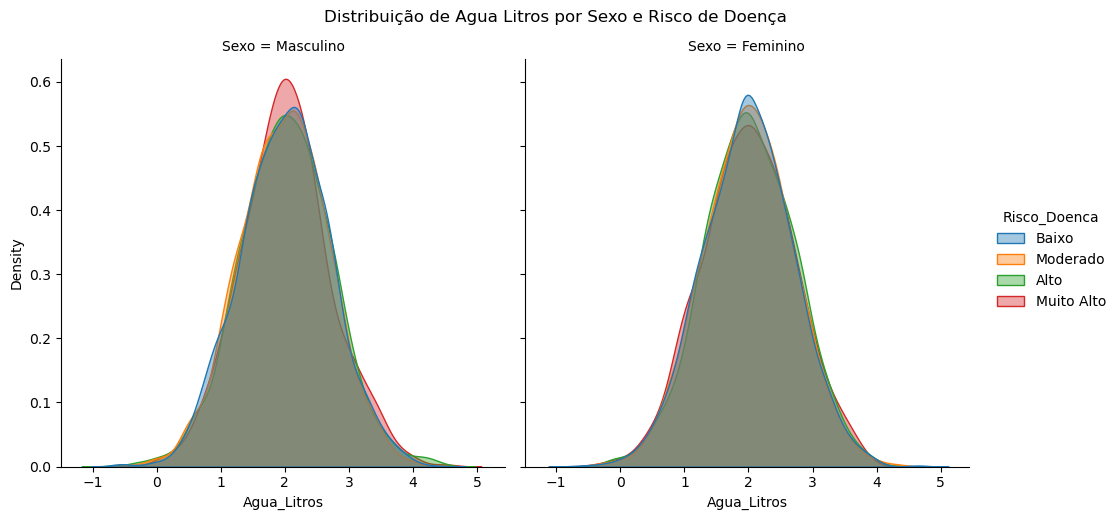

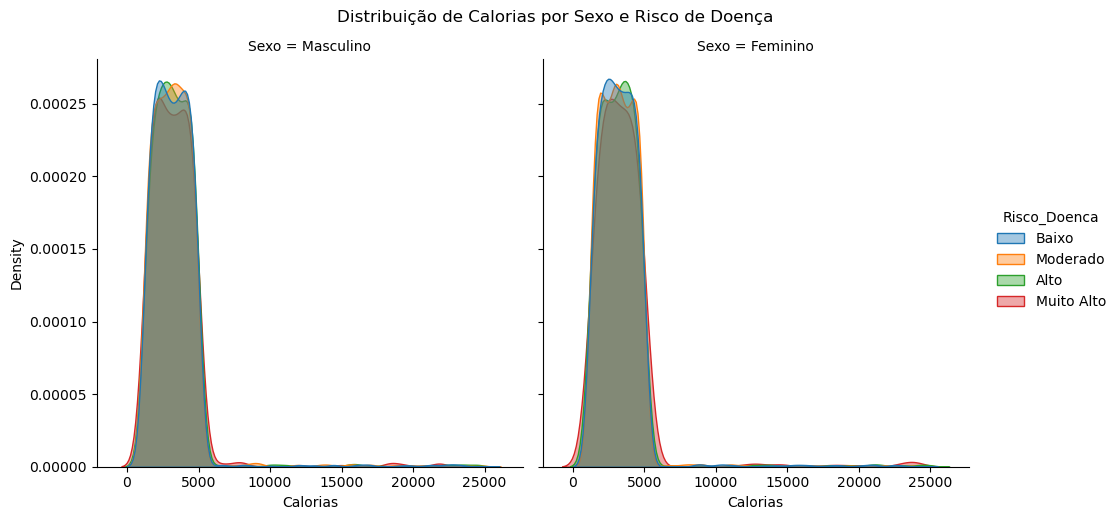

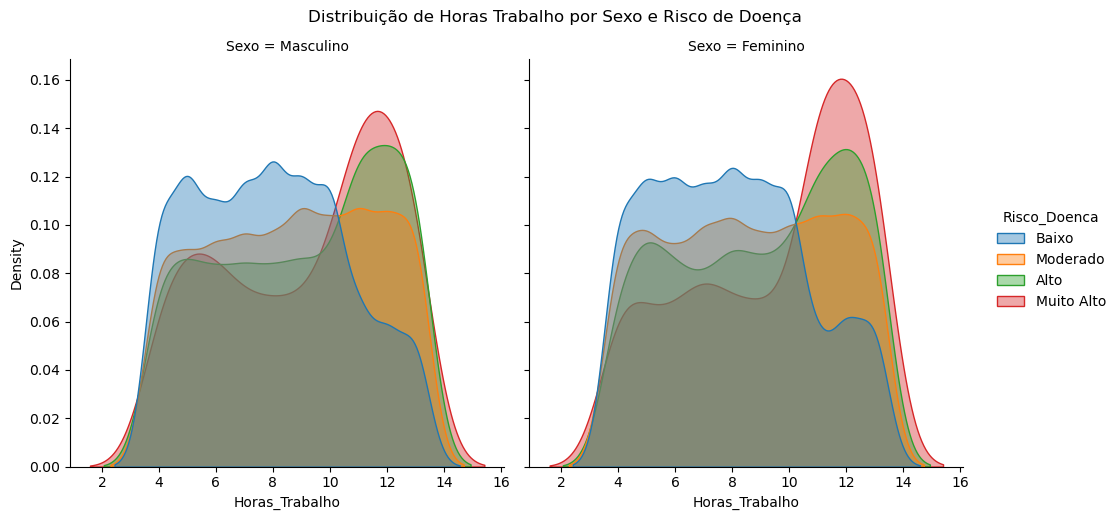

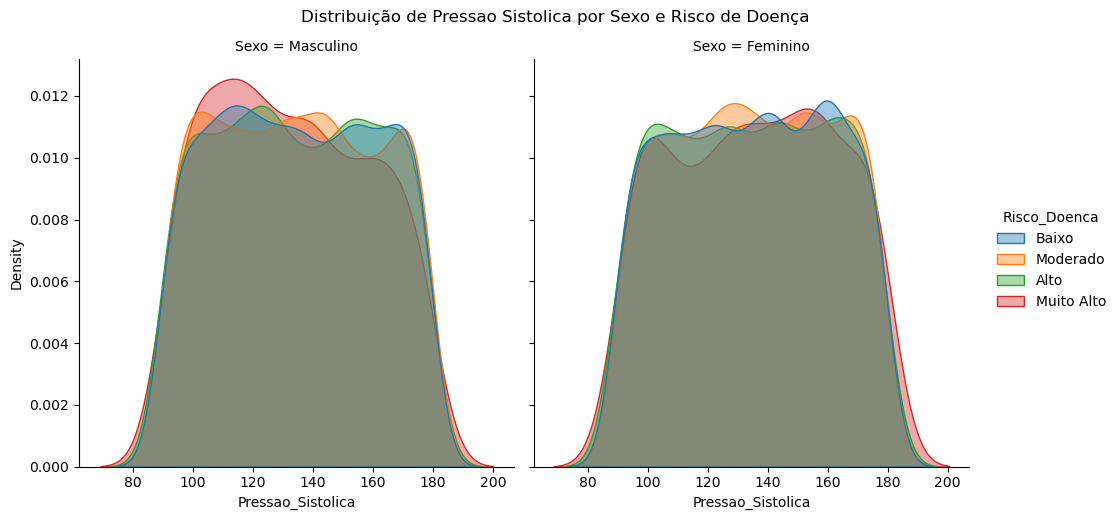

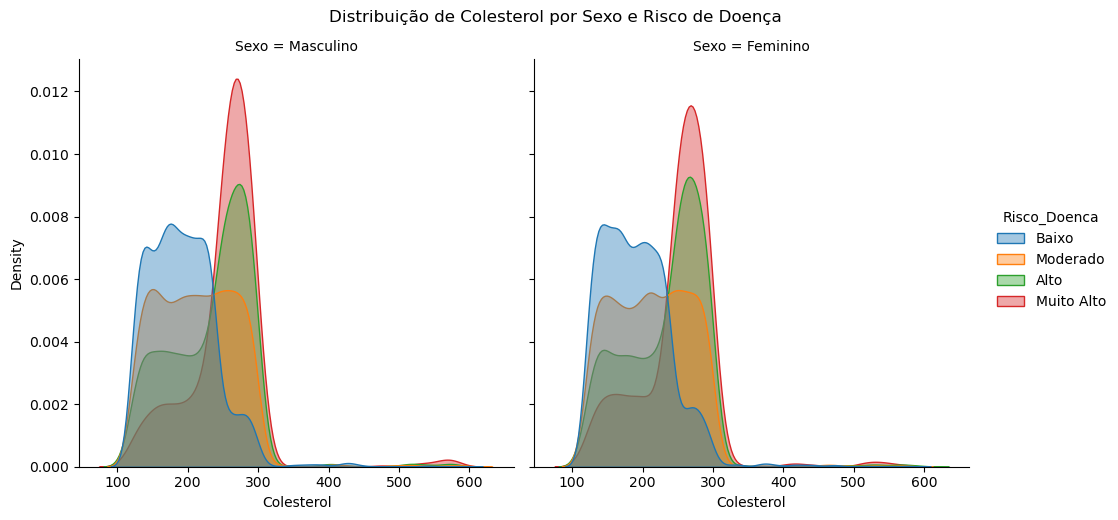

In [52]:
for coluna in colunas_numericas:

    g = sns.displot(
        data=df_clean,
        x=coluna,
        hue='Risco_Doenca', 
        col='Sexo',         
        kind='kde',         
        
        fill=True,
        common_norm=False,
        alpha=0.4
    )
    
   
    g.fig.suptitle(f'Distribuição de {coluna.replace("_", " ").title()} por Sexo e Risco de Doença', y=1.03)
    plt.show()

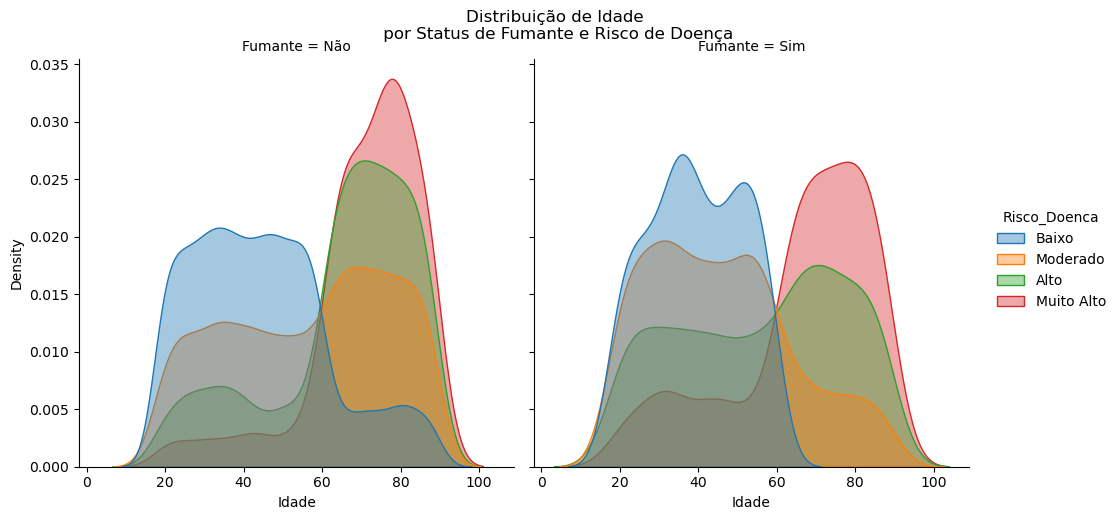

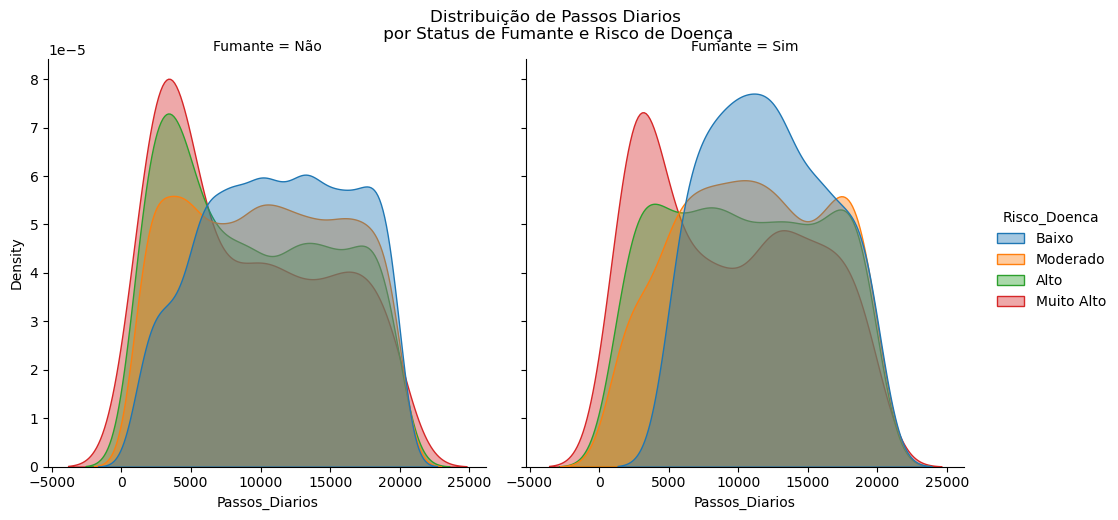

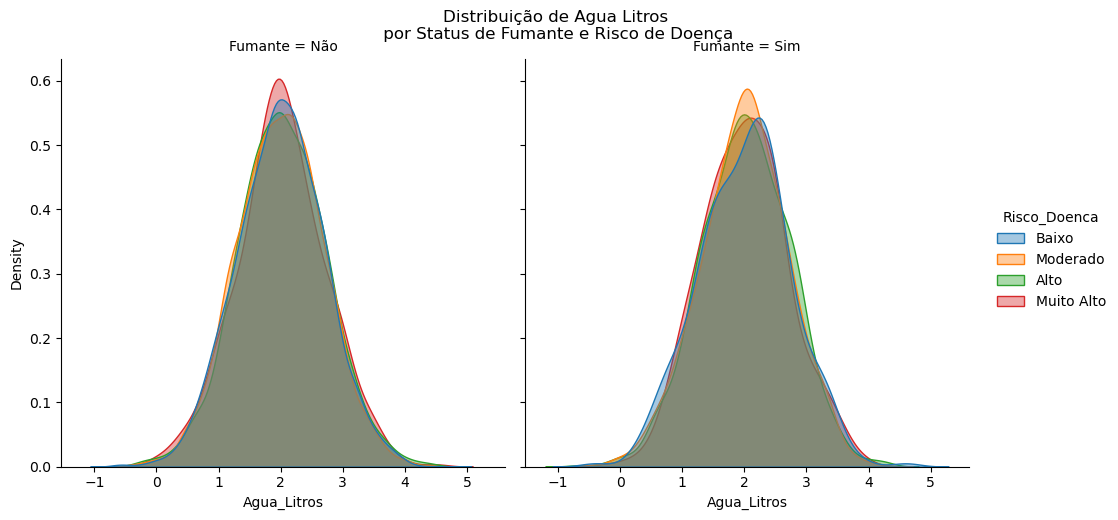

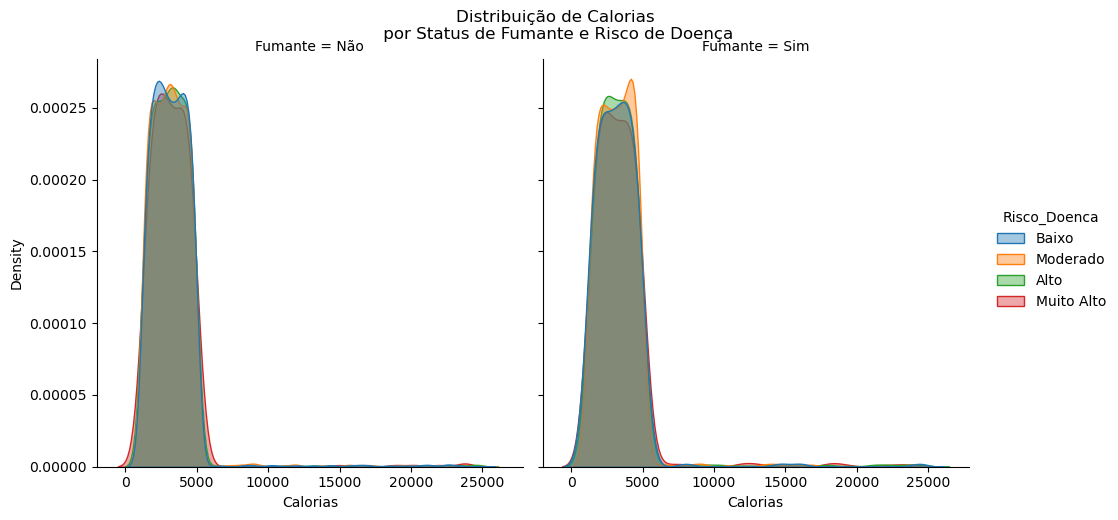

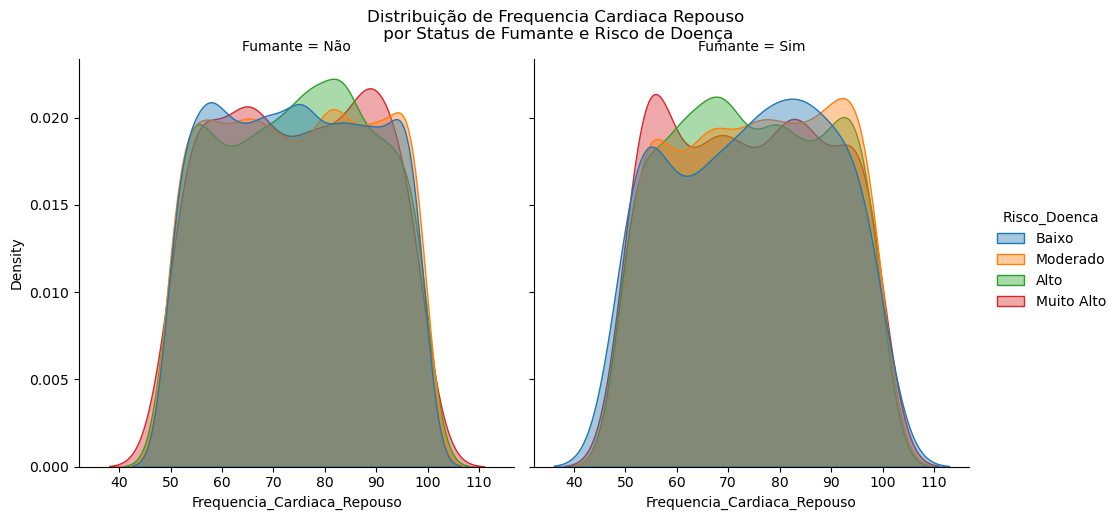

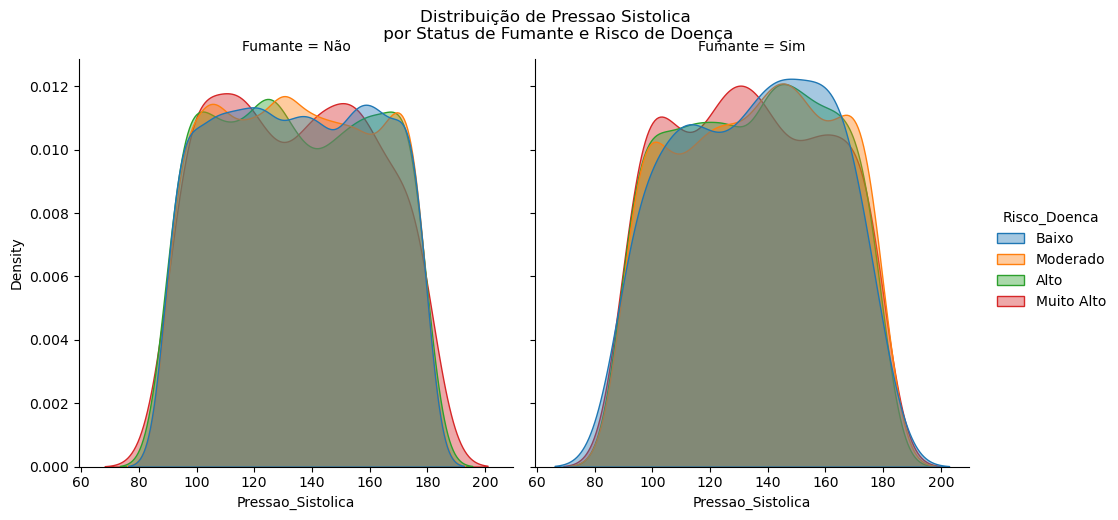

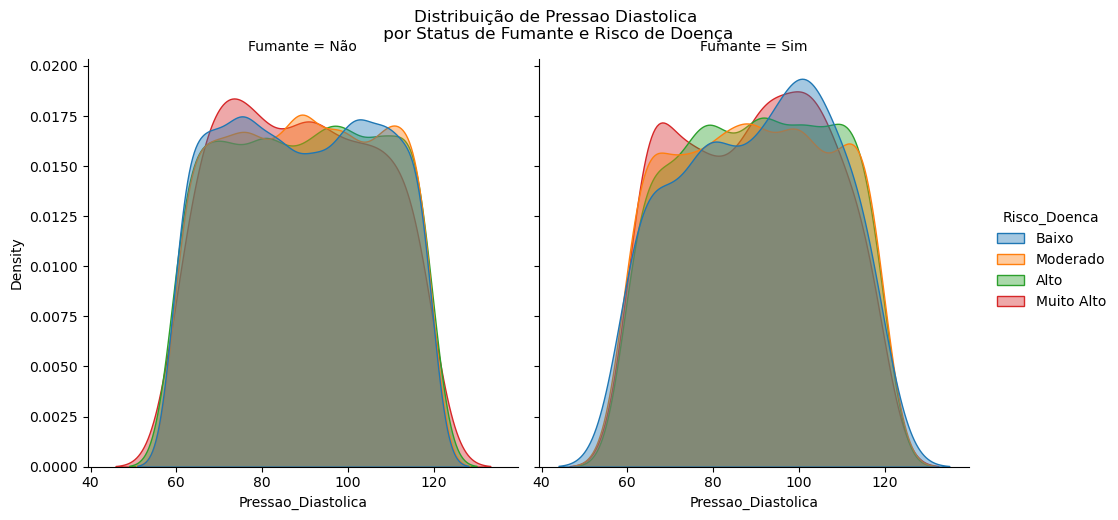

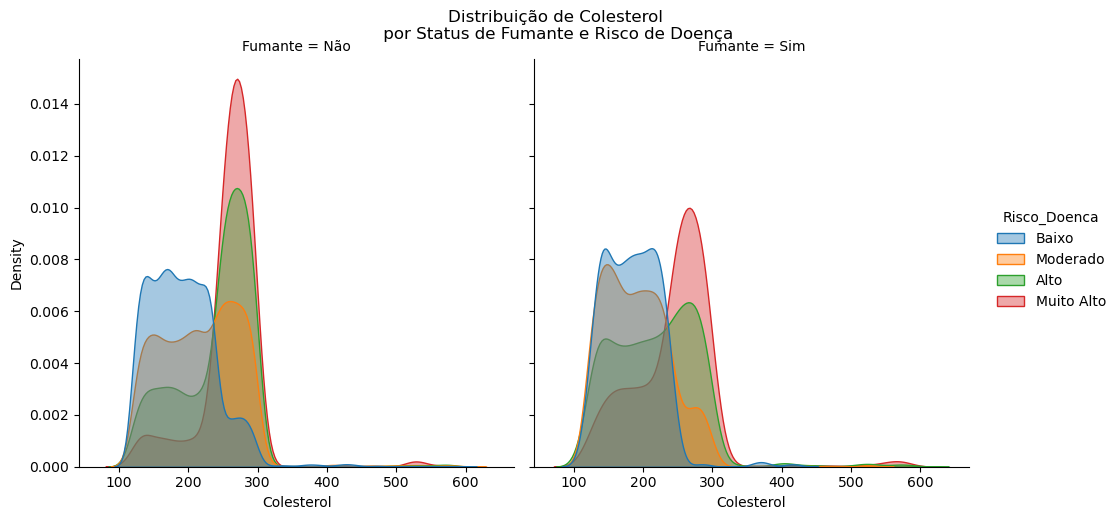

In [54]:
for coluna in colunas_numericas:
    g = sns.displot(
        data=df_clean,
        x=coluna,
        hue='Risco_Doenca', 
        col='Fumante',      
        kind='kde',
        
        fill=True,
        common_norm=False,
        alpha=0.4
    )
    
    
    g.fig.suptitle(f'Distribuição de {coluna.replace("_", " ").title()}\n por Status de Fumante e Risco de Doença', y=1.03)
    plt.show()

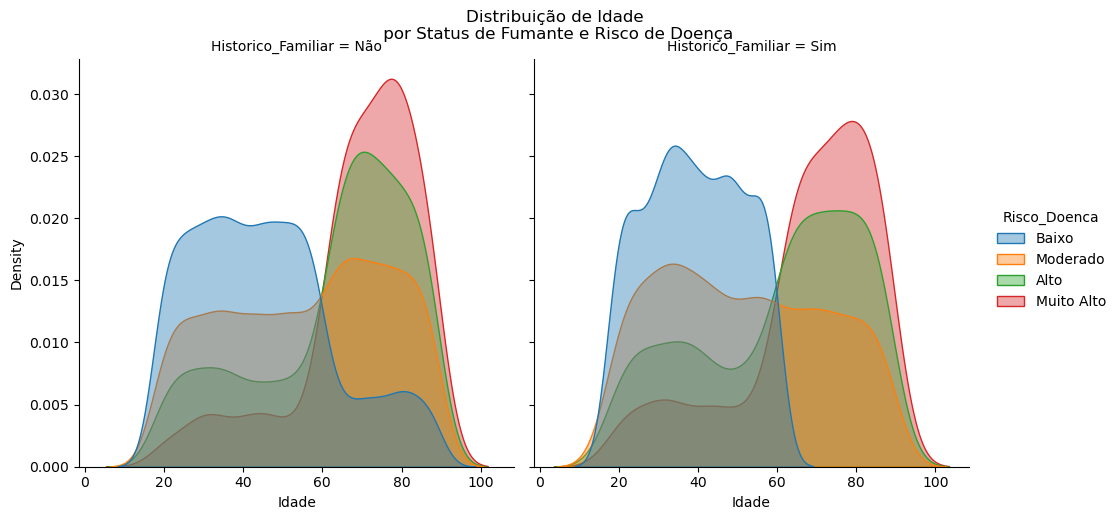

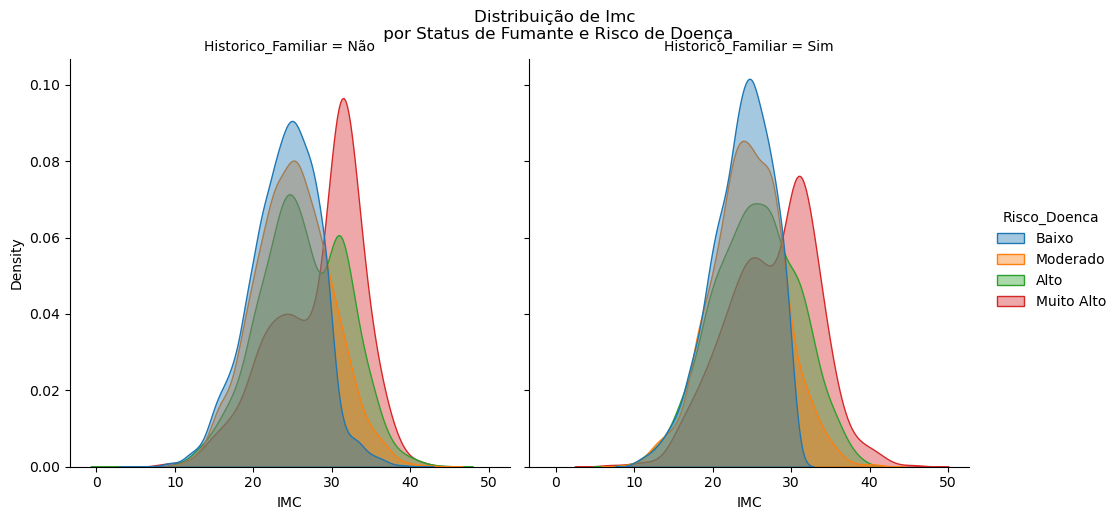

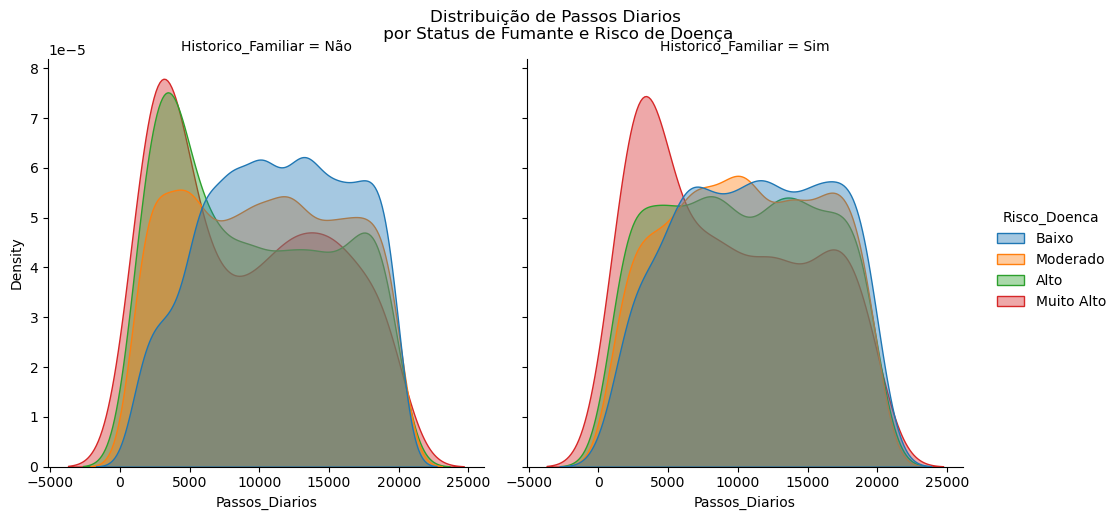

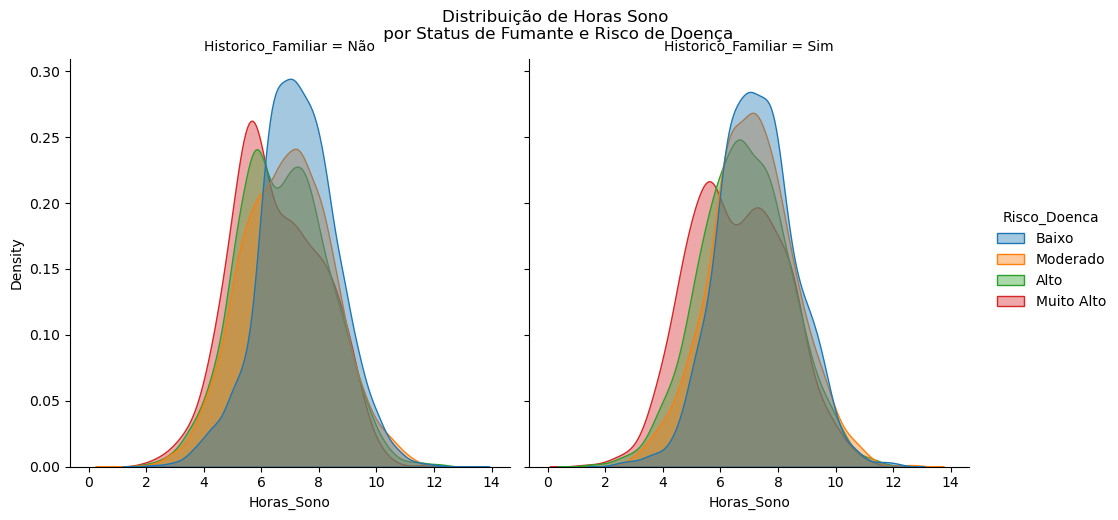

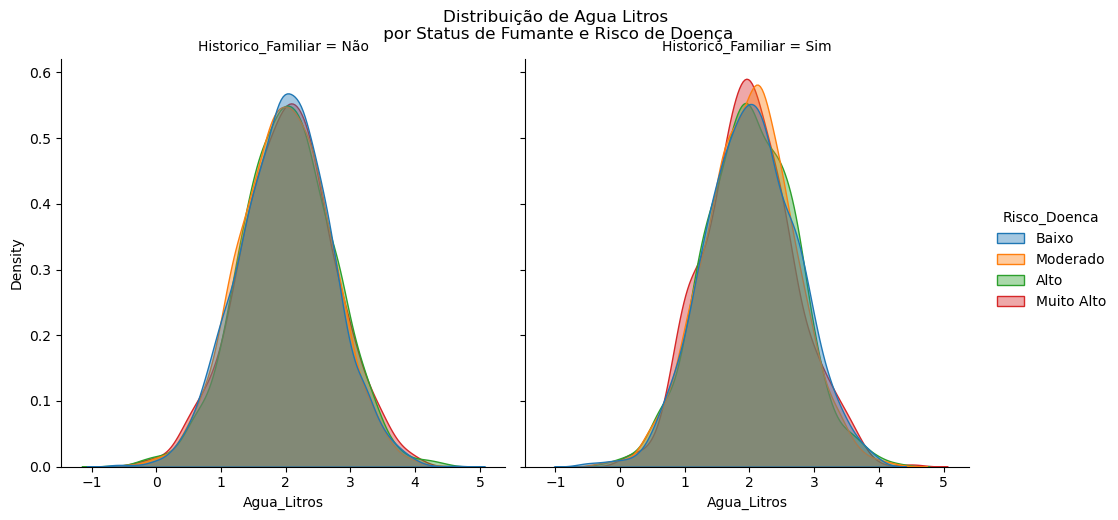

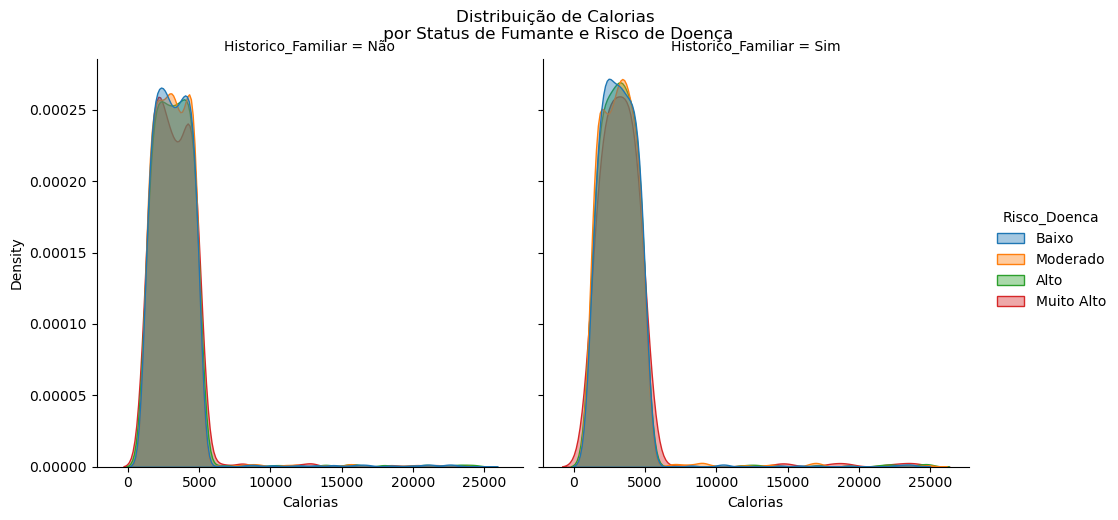

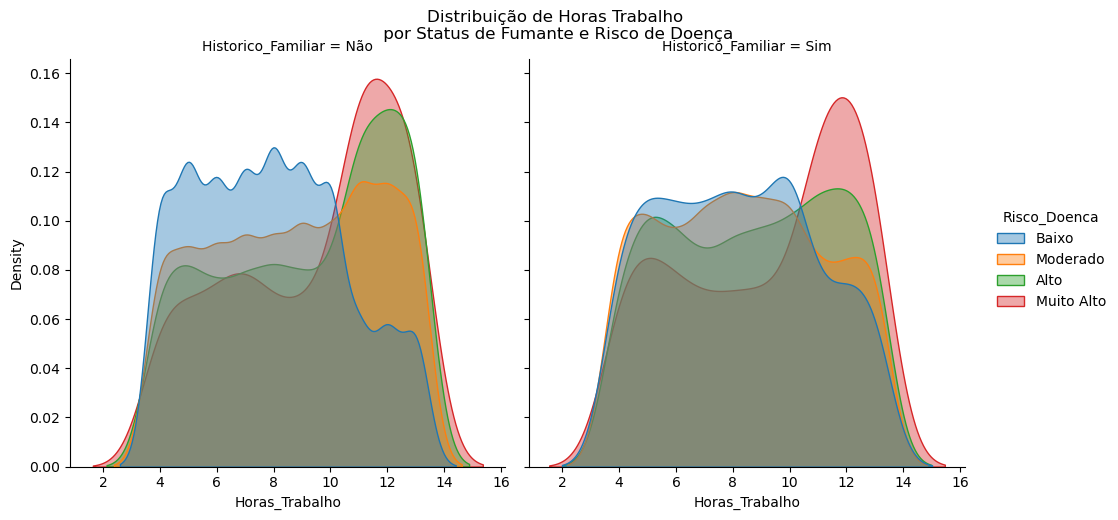

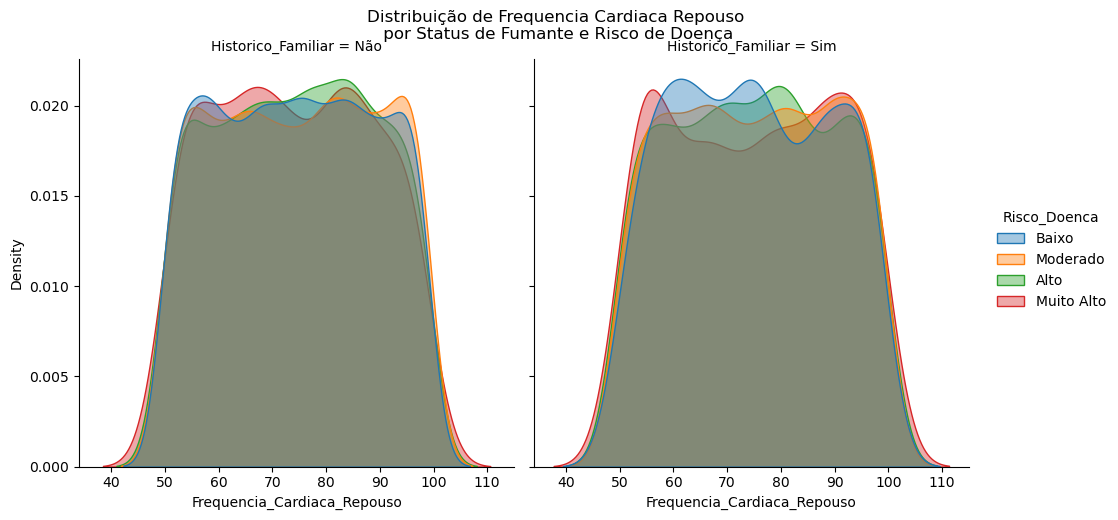

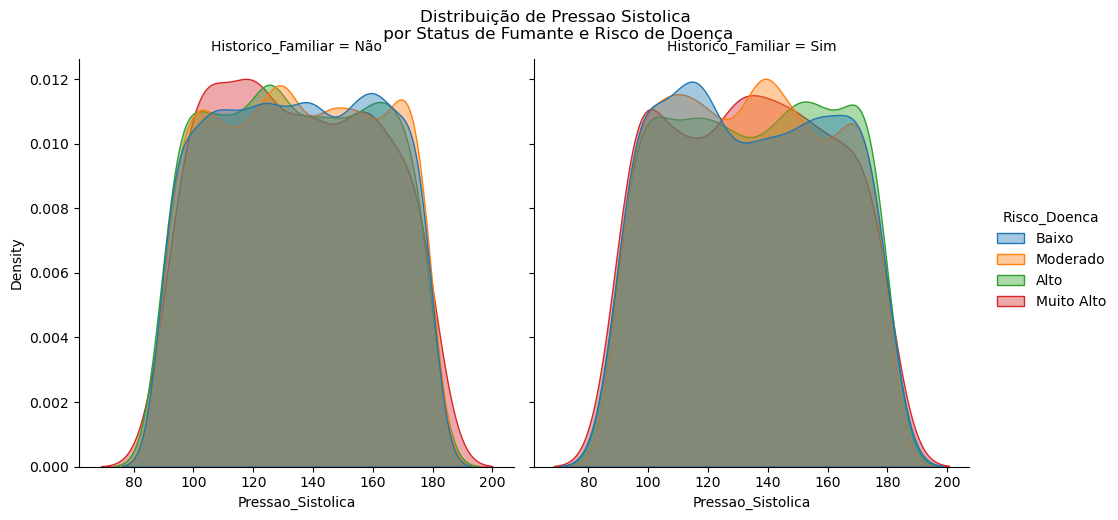

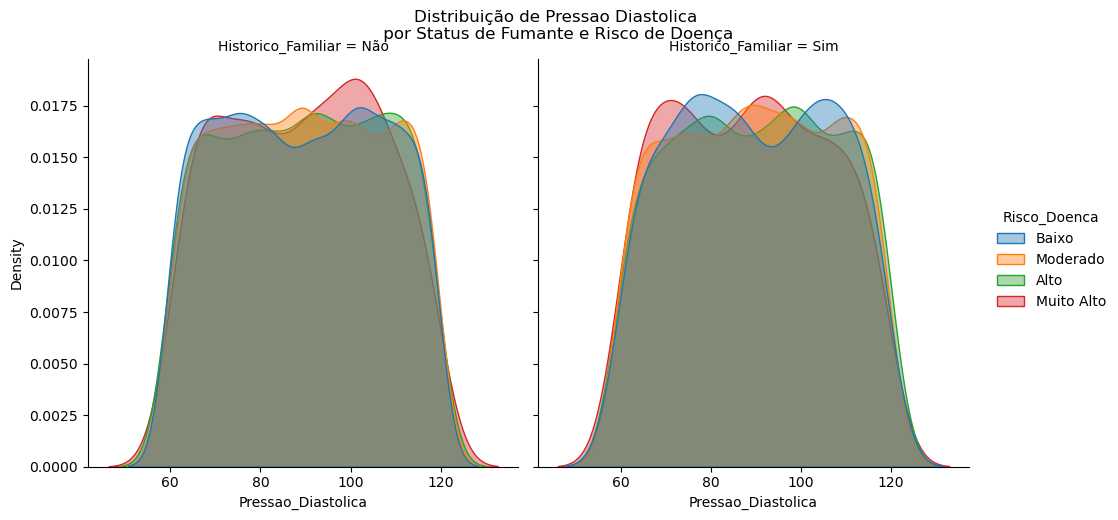

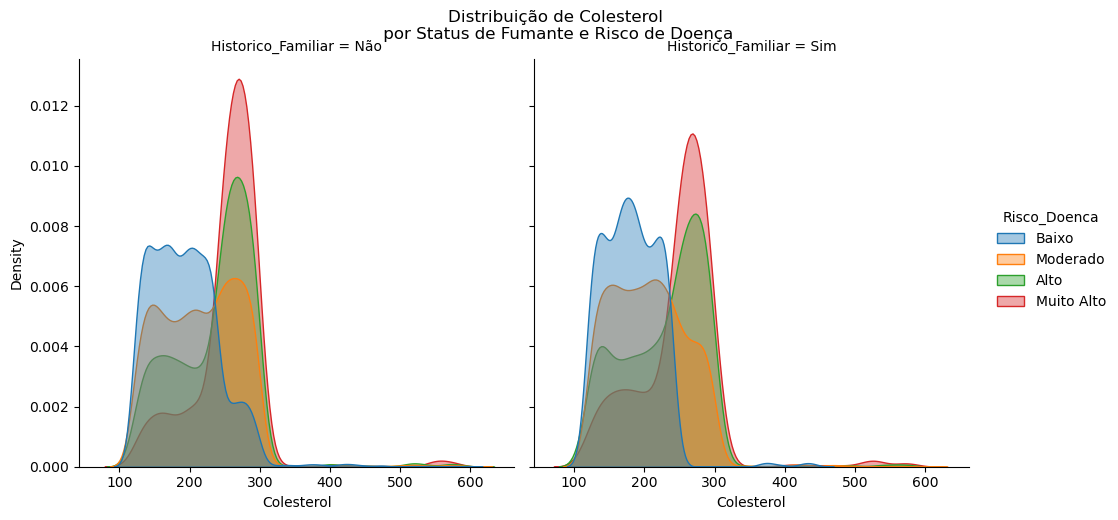

In [56]:
for coluna in colunas_numericas:
    g = sns.displot(
        data=df_clean,
        x=coluna,
        hue='Risco_Doenca', 
        col='Historico_Familiar',      
        kind='kde',
        
        fill=True,
        common_norm=False,
        alpha=0.4
    )
    
    
    g.fig.suptitle(f'Distribuição de {coluna.replace("_", " ").title()}\n por Status de Fumante e Risco de Doença', y=1.03)
    plt.show()

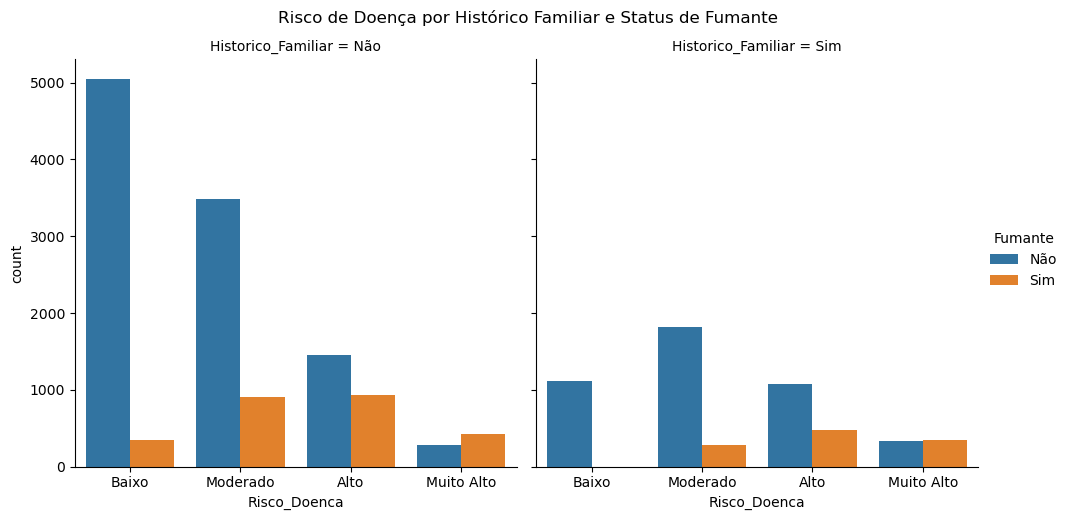

In [62]:
sns.catplot(
    data=df_clean,
    x='Risco_Doenca',
    col='Historico_Familiar', 
    hue='Fumante',           
    kind='count',             
    order=['Baixo', 'Moderado', 'Alto', 'Muito Alto'] # Ordena o eixo x
)
plt.suptitle('Risco de Doença por Histórico Familiar e Status de Fumante', y=1.03)
plt.show()

# Tratamento OUTLIERS

In [80]:
def remover_outliers_iqr(df, nome_coluna):
    """
    Remove outliers de uma coluna específica de um DataFrame usando o método IQR.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        nome_coluna (str): O nome da coluna para filtrar os outliers.

    Returns:
        pd.DataFrame: Um novo DataFrame sem os outliers da coluna especificada.
    """
    print(f"--- Analisando a coluna: {nome_coluna} ---")
    print(f"Total de dados ANTES do filtro: {len(df)}")

   
    Q1 = df[nome_coluna].quantile(0.25)
    Q3 = df[nome_coluna].quantile(0.75)
    Amp_interquartil = Q3 - Q1
    limite_inferior = Q1 - (1.5 * Amp_interquartil)
    limite_superior = Q3 + (1.5 * Amp_interquartil)

    print(f"Limite inferior: {limite_inferior:.2f} | Limite superior: {limite_superior:.2f}")

    
    df_filtrado = df[df[nome_coluna].between(limite_inferior, limite_superior)]
    
    print(f"Total de dados DEPOIS do filtro: {len(df_filtrado)}")
    removidos = len(df) - len(df_filtrado)
    print(f"Total de outliers removidos: {removidos}")
    print("-" * (30 + len(nome_coluna)) + "\n")
    
    return df_filtrado

In [82]:
df_filtrado = df_clean.copy()

for coluna in colunas_quantitativas:
    df_filtrado = remover_outliers_iqr(df_filtrado, coluna)

print(f"== PROCESSO FINALIZADO ==")
print(f"Tamanho original do DataFrame: {len(df_clean)}")
print(f"Tamanho final do DataFrame após remoção de outliers: {len(df_filtrado)}")

--- Analisando a coluna: Idade ---
Total de dados ANTES do filtro: 18313
Limite inferior: -19.00 | Limite superior: 125.00
Total de dados DEPOIS do filtro: 18313
Total de outliers removidos: 0
-----------------------------------

--- Analisando a coluna: IMC ---
Total de dados ANTES do filtro: 18313
Limite inferior: 11.55 | Limite superior: 38.35
Total de dados DEPOIS do filtro: 18188
Total de outliers removidos: 125
---------------------------------

--- Analisando a coluna: Passos_Diarios ---
Total de dados ANTES do filtro: 18188
Limite inferior: -8255.88 | Limite superior: 29341.12
Total de dados DEPOIS do filtro: 18188
Total de outliers removidos: 0
--------------------------------------------

--- Analisando a coluna: Horas_Sono ---
Total de dados ANTES do filtro: 18188
Limite inferior: 3.00 | Limite superior: 11.00
Total de dados DEPOIS do filtro: 18048
Total de outliers removidos: 140
----------------------------------------

--- Analisando a coluna: Agua_Litros ---
Total de dad

In [94]:
coluna = 'Agua_Litros'

print(f"--- ANTES DA SUBSTITUIÇÃO NA COLUNA '{coluna}' ---")
print(f"Valores zerados encontrados: {(df_filtrado[coluna] == 0).sum()}")
print(df_filtrado[coluna].describe())
print("\n")

median_agua = df_filtrado[df_filtrado[coluna] > 0][coluna].median()

df_filtrado.loc[df_filtrado[coluna] == 0, coluna] = median_agua

print(f"--- DEPOIS DA SUBSTITUIÇÃO NA COLUNA '{coluna}' ---")
print(f"Mediana calculada (usada para preenchimento): {median_agua}")
print(f"Valores zerados encontrados: {(df_filtrado[coluna] == 0).sum()}")
print(df_filtrado[coluna].describe())

--- ANTES DA SUBSTITUIÇÃO NA COLUNA 'Agua_Litros' ---
Valores zerados encontrados: 29
count    17714.000000
mean         2.001011
std          0.693164
min          0.000000
25%          1.500000
50%          2.000000
75%          2.500000
max          4.000000
Name: Agua_Litros, dtype: float64


--- DEPOIS DA SUBSTITUIÇÃO NA COLUNA 'Agua_Litros' ---
Mediana calculada (usada para preenchimento): 2.0
Valores zerados encontrados: 0
count    17714.000000
mean         2.004285
std          0.688411
min          0.100000
25%          1.500000
50%          2.000000
75%          2.500000
max          4.000000
Name: Agua_Litros, dtype: float64


In [96]:
df_filtrado[colunas_quantitativas].describe().T

count          mean          std     min  \
Idade                        17714.0     53.424015    20.744692    18.0   
IMC                          17714.0     24.967596     4.848880    11.6   
Passos_Diarios               17714.0  10535.661849  5454.492078  1000.0   
Horas_Sono                   17714.0      7.008716     1.459590     3.0   
Agua_Litros                  17714.0      2.004285     0.688411     0.1   
Calorias                     17714.0   3104.387885  1102.346068  1200.0   
Horas_Trabalho               17714.0      8.504629     2.859081     4.0   
Frequencia_Cardiaca_Repouso  17714.0     74.557751    14.520993    50.0   
Pressao_Sistolica            17714.0    134.569493    26.076637    90.0   
Pressao_Diastolica           17714.0     89.571074    17.326555    60.0   
Colesterol                   17714.0    209.214463    52.203546   120.0   

                                 25%      50%       75%      max  
Idade                          35.00     53.0     71.00     89.0  
IMC                            21.70     24.9     28.30     38.3  
Passos_Diarios               5855.25  10533.0  15251.75  19999.0  
Horas_Sono                      6.00      7.0      8.00     11.0  
Agua_Litros                     1.50      2.0      2.50      4.0  
Calorias                     2145.00   3104.0   4072.00   6930.0  
Horas_Trabalho                  6.00      9.0     11.00     13.0  
Frequencia_Cardiaca_Repouso    62.00     75.0     87.00     99.0  
Pressao_Sistolica             112.00    134.0    157.00    179.0  
Pressao_Diastolica             75.00     90.0    104.00    119.0  
Colesterol                    164.00    209.0    255.00    374.0

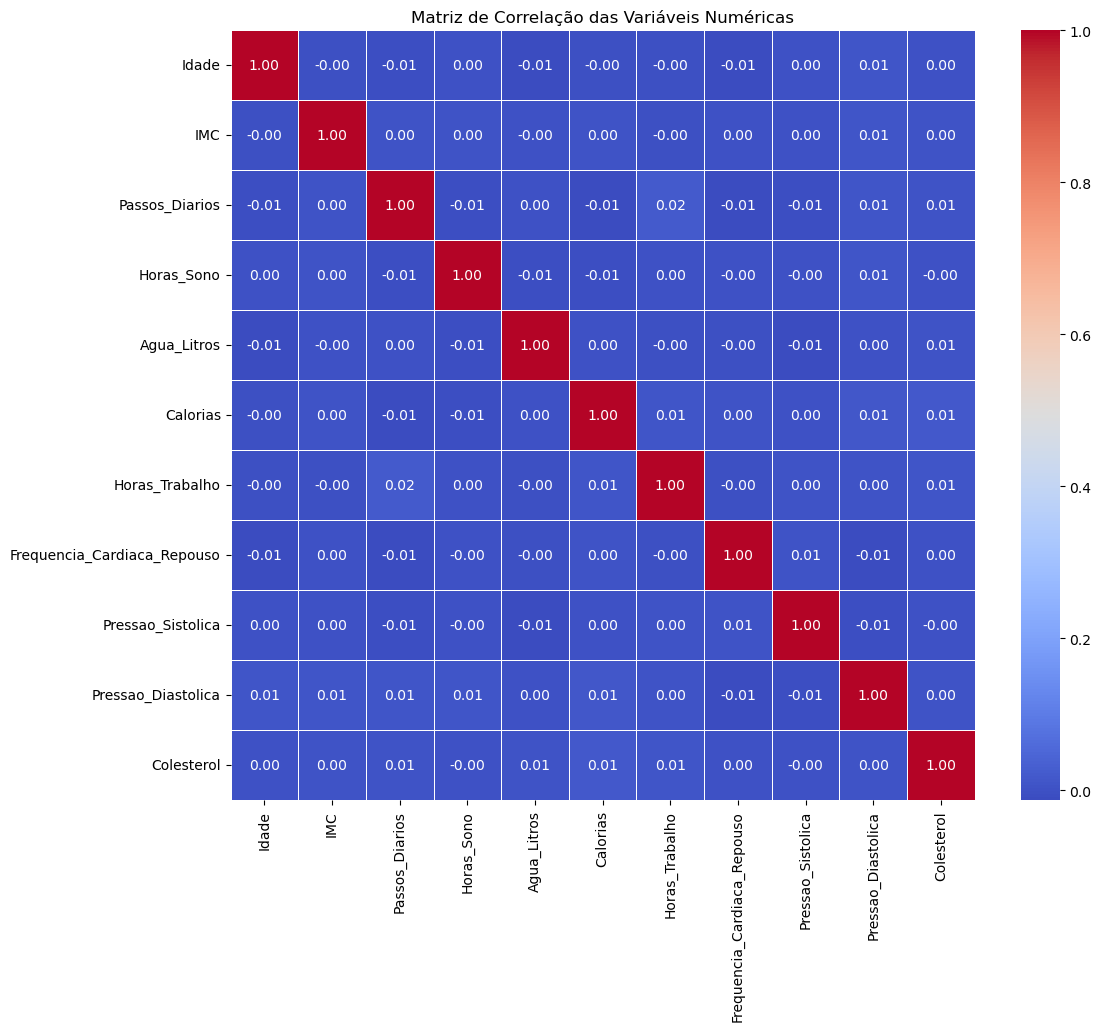

In [99]:
# Calcula a matriz de correlação
matriz_corr = df_filtrado[colunas_quantitativas].corr()

# Cria o gráfico de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

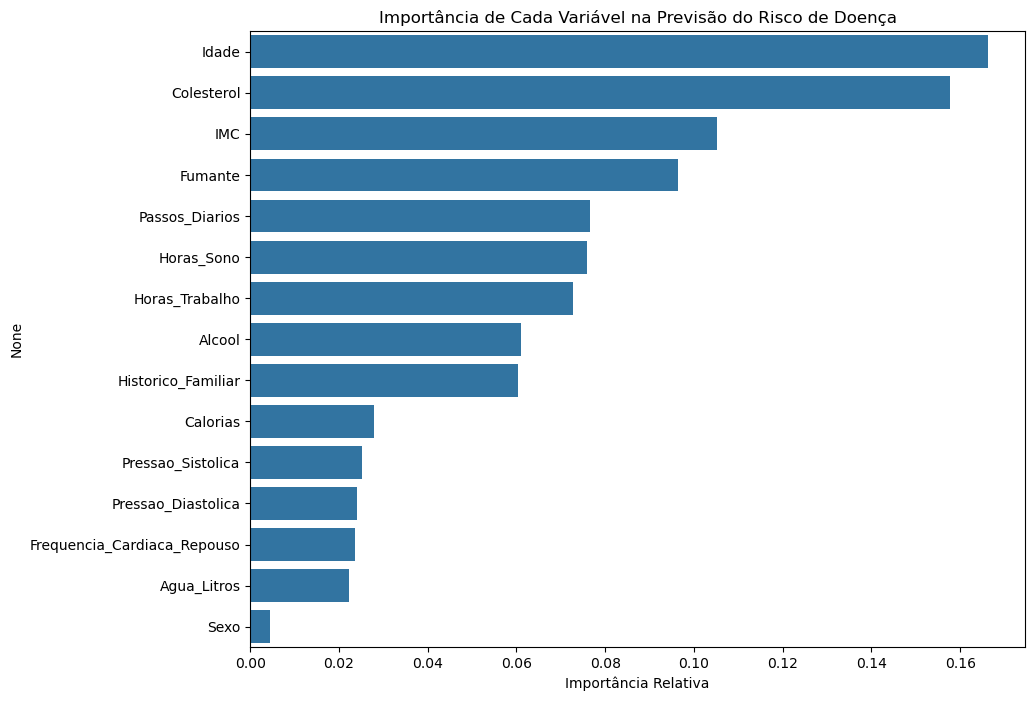

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df_model = df_filtrado.copy()
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])


X = df_model.drop('Risco_Doenca', axis=1)
y = df_model['Risco_Doenca']


model = RandomForestClassifier(random_state=42)
model.fit(X, y)


importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances, y=importances.index)
plt.title('Importância de Cada Variável na Previsão do Risco de Doença')
plt.xlabel('Importância Relativa')
plt.show()

# Treinamento

In [105]:
# 1. Separar as variáveis preditoras (X) da variável alvo (y)
X = df_filtrado.drop('Risco_Doenca', axis=1)
y = df_filtrado['Risco_Doenca']

In [117]:
from sklearn.preprocessing import LabelEncoder

colunas_para_codificar = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=colunas_para_codificar, drop_first=True, dtype=int)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


print("\n\n--- DEPOIS DA CONVERSÃO ---")
print("\nVariáveis preditoras (X) transformadas:")
display(X_encoded.head())

print("\nVariável alvo (y) transformada:")
print(y_encoded)



--- DEPOIS DA CONVERSÃO ---

Variáveis preditoras (X) transformadas:


Idade   IMC  Passos_Diarios  Horas_Sono  Agua_Litros  Calorias  \
0   69.0  29.1         15604.0         7.4          0.9    1297.0   
1   32.0  22.3          9607.0         7.6          1.9    3529.0   
2   89.0  25.6          4160.0         6.7          2.3    4399.0   
3   78.0  35.3          3569.0         6.9          0.7    1595.0   
5   41.0  27.5          8550.0         6.2          1.8    1785.0   

   Horas_Trabalho  Frequencia_Cardiaca_Repouso  Pressao_Sistolica  \
0               8                           86                123   
1              12                           54                140   
2              10                           75                110   
3               9                           92                167   
5              11                           99                106   

   Pressao_Diastolica  Colesterol  Sexo_Masculino  Fumante_Sim  Alcool_Baixo  \
0                  95       225.0               1            0             0   
1                  85       222.0               0            0             0   
2                  60       131.0               1            0             0   
3                 117       199.0               0            0             1   
5                  88       243.0               0            0             0   

   Alcool_Moderado  Historico_Familiar_Sim  
0                1                       0  
1                1                       1  
2                1                       1  
3                0                       0  
5                1                       0


Variável alvo (y) transformada:
[1 1 2 ... 0 3 1]


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividindo os dados: 80% para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y_encoded, 
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

## NORMALIZAR OS DADOS ###
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

# Verificando o tamanho de cada conjunto de dados
print("--- Divisão dos Dados Concluída ---")
print(f"Shape de X_train (dados de treino): {X_train.shape}")
print(f"Shape de X_test (dados de teste): {X_test.shape}")
print(f"Shape de y_train (alvo de treino): {y_train.shape}")
print(f"Shape de y_test (alvo de teste): {y_test.shape}")

--- Divisão dos Dados Concluída ---
Shape de X_train (dados de treino): (14171, 16)
Shape de X_test (dados de teste): (3543, 16)
Shape de y_train (alvo de treino): (14171,)
Shape de y_test (alvo de teste): (3543,)


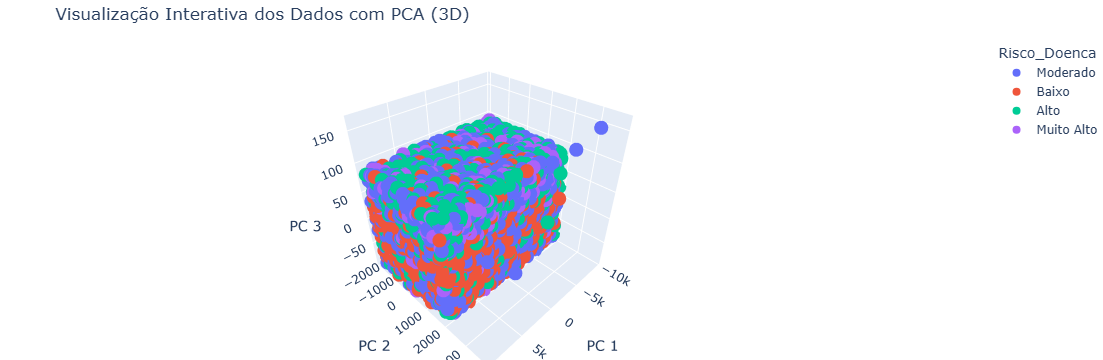

In [191]:
import plotly.express as px
from sklearn.decomposition import PCA


pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

df_pca_3d = pd.DataFrame(
    data=X_train_pca_3d, 
    columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3']
)

df_pca_3d['Risco_Doenca'] = label_encoder.inverse_transform(y_train)

fig = px.scatter_3d(
    data_frame=df_pca_3d,
    x='Componente Principal 1',
    y='Componente Principal 2',
    z='Componente Principal 3',
    color='Risco_Doenca', 
    title='Visualização Interativa dos Dados com PCA (3D)',
    labels={'Componente Principal 1': 'PC 1', 'Componente Principal 2': 'PC 2', 'Componente Principal 3': 'PC 3'}
)


fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))


fig.show()

In [125]:
quantidade_classes = y.value_counts()
print(quantidade_classes)

Risco_Doenca
Baixo         6320
Moderado      6290
Alto          3791
Muito Alto    1313
Name: count, dtype: int64


In [169]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)

print(f"Distribuição original (treino): {Counter(y_train)}")

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(f"Distribuição após SMOTE (treino): {Counter(y_train_resampled)}")

Distribuição original (treino): Counter({1: 5056, 2: 5032, 0: 3033, 3: 1050})
Distribuição após SMOTE (treino): Counter({2: 5056, 1: 5056, 0: 5056, 3: 5056})


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.001, 0.01] # Adicionado para testar a poda
}


grid_Arvore_Decisao = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)



grid_Arvore_Decisao.fit(X_train_resampled, y_train_resampled)


print("\nBusca finalizada!")
print("Melhores parâmetros encontrados:", grid_Arvore_Decisao.best_params_)
print(f"Melhor score (f1_weighted) na validação cruzada: {grid_Arvore_Decisao.best_score_:.4f}")

y_pred_Arvore_Decisao = grid_Arvore_Decisao.predict(X_test)

print("\n--- Relatório de Classificação da Melhor Árvore de Decisão no Teste ---")
print(classification_report(y_test, y_pred_Arvore_Decisao, target_names=label_encoder.classes_))

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Busca finalizada!
Melhores parâmetros encontrados: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor score (f1_weighted) na validação cruzada: 0.8330

--- Relatório de Classificação da Melhor Árvore de Decisão no Teste ---
              precision    recall  f1-score   support

        Alto       0.87      0.85      0.86       758
       Baixo       1.00      0.99      1.00      1264
    Moderado       0.99      0.96      0.97      1258
  Muito Alto       0.69      0.85      0.76       263

    accuracy                           0.94      3543
   macro avg       0.89      0.91      0.90      3543
weighted avg       0.95      0.94      0.94      3543



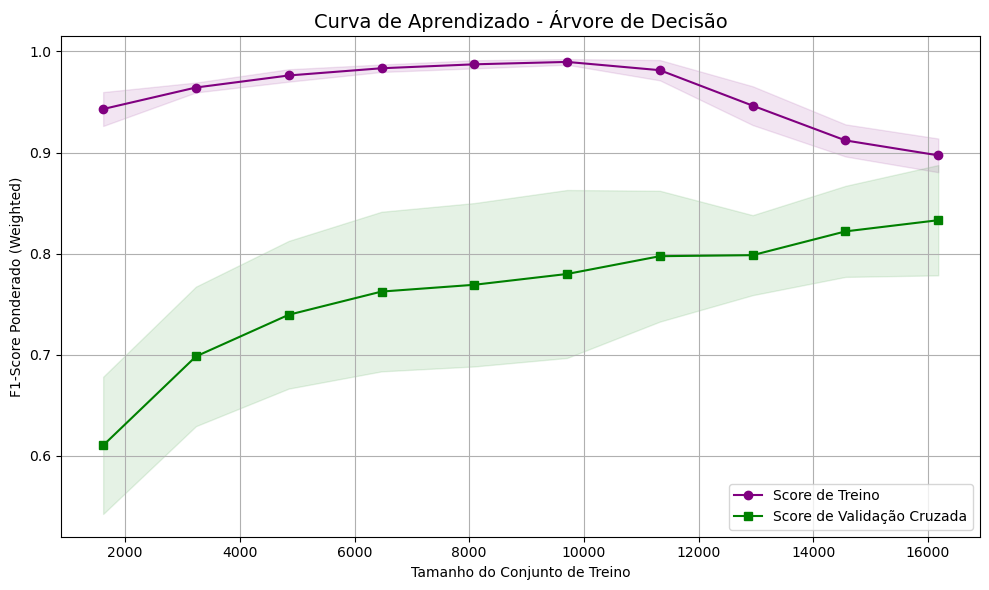

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

best_params_dt = grid_Arvore_Decisao.best_params_
model_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_dt,
    X=X_train_resampled,
    y=y_train_resampled,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_mean, 'o-', color="purple", label='Score de Treino')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="purple")

plt.plot(train_sizes, test_mean, 's-', color="green", label='Score de Validação Cruzada')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

plt.title('Curva de Aprendizado - Árvore de Decisão', fontsize=14)
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score Ponderado (Weighted)') # Rótulo do eixo Y atualizado
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 


rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 20],
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 0.5],
    'bootstrap': [True] 
   
}

grid_RandomForest = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2 
)


grid_RandomForest.fit(X_train_resampled, y_train_resampled)


print("\nBusca finalizada!")
print("Melhores parâmetros encontrados:", grid_RandomForest.best_params_)
print(f"Melhor score (f1_weighted) na validação cruzada: {grid_RandomForest.best_score_:.4f}")

y_pred_Floresta_Aleatoria = grid_RandomForest.predict(X_test)

print("\n--- Relatório de Classificação do Melhor Modelo no Conjunto de Teste ---")
print(classification_report(y_test, y_pred_final, target_names=label_encoder.classes_))


Fitting 5 folds for each of 162 candidates, totalling 810 fits

Busca finalizada!
Melhores parâmetros encontrados: {'bootstrap': True, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Melhor score (f1_weighted) na validação cruzada: 0.8532

--- Relatório de Classificação do Melhor Modelo no Conjunto de Teste ---
              precision    recall  f1-score   support

        Alto       0.86      0.89      0.88       758
       Baixo       0.99      1.00      1.00      1264
    Moderado       0.98      0.95      0.96      1258
  Muito Alto       0.78      0.80      0.79       263

    accuracy                           0.94      3543
   macro avg       0.90      0.91      0.91      3543
weighted avg       0.94      0.94      0.94      3543



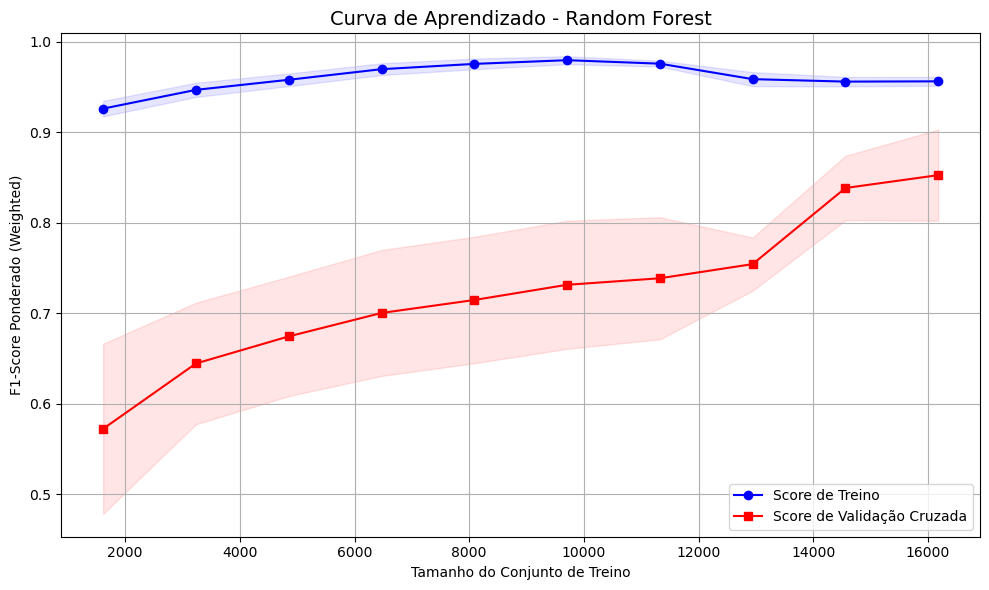

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

best_params = grid_RandomForest.best_params_
model = RandomForestClassifier(**best_params, random_state=42)


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train_resampled,
    y=y_train_resampled,
    cv=5, 
    scoring='f1_weighted',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_mean, 'o-', color="blue", label='Score de Treino')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

plt.plot(train_sizes, test_mean, 's-', color="red", label='Score de Validação Cruzada')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.title('Curva de Aprendizado - Random Forest', fontsize=14)
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score Ponderado (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [171]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np


n_classes = len(np.unique(y_encoded))
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=n_classes,       
    eval_metric='mlogloss',
    random_state=42
)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}


grid_xgboost = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)



grid_xgboost.fit(X_train_scaled, y_train_resampled)



print("\nBusca finalizada!")
print("Melhores parâmetros encontrados:", grid_xgboost.best_params_)
print(f"Melhor score (f1_weighted) na validação cruzada: {grid_xgboost.best_score_:.4f}")


y_pred_xgboost = grid_xgboost.predict(X_test_scaled)

print("\n--- Relatório de Classificação do Melhor Modelo XGBoost no Teste ---")
print(classification_report(y_test, y_pred_xgboost, target_names=label_encoder.classes_))

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Busca finalizada!
Melhores parâmetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200}
Melhor score (f1_weighted) na validação cruzada: 0.8900

--- Relatório de Classificação do Melhor Modelo XGBoost no Teste ---
              precision    recall  f1-score   support

        Alto       0.84      0.86      0.85       758
       Baixo       1.00      1.00      1.00      1264
    Moderado       0.96      0.96      0.96      1258
  Muito Alto       0.76      0.69      0.73       263

    accuracy                           0.93      3543
   macro avg       0.89      0.88      0.88      3543
weighted avg       0.93      0.93      0.93      3543



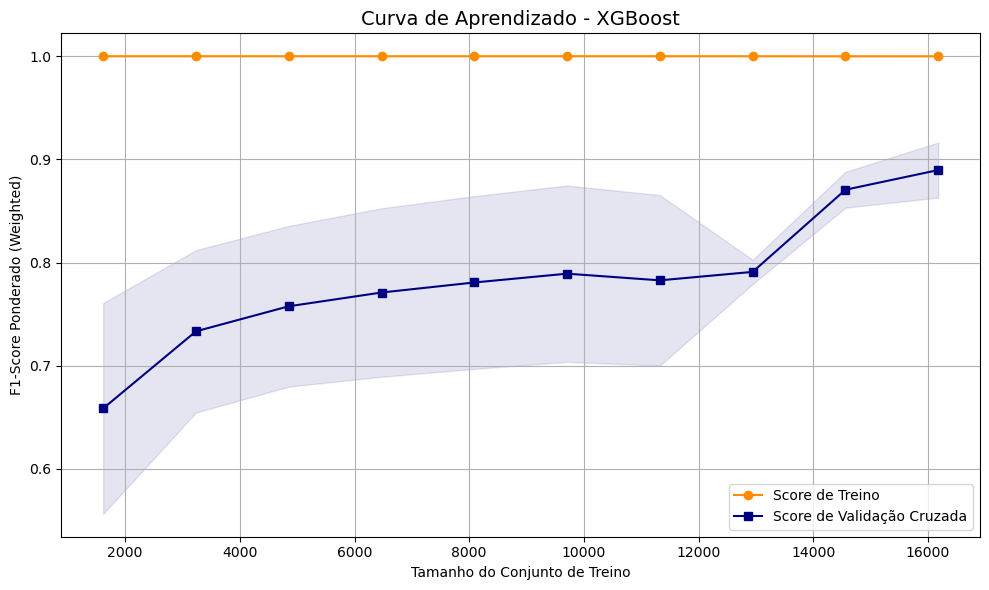

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb


best_params_xgb = grid_xgboost.best_params_

n_classes = len(np.unique(y_encoded))


model_xgb = xgb.XGBClassifier(
    **best_params_xgb,
    objective='multi:softprob',
    num_class=n_classes,
    eval_metric='mlogloss',
    random_state=42
)


train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_xgb,
    X=X_train_scaled,
    y=y_train_resampled,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot da curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="darkorange", label='Score de Treino')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="darkorange")
plt.plot(train_sizes, test_mean, 's-', color="navy", label='Score de Validação Cruzada')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="navy")
plt.title('Curva de Aprendizado - XGBoost', fontsize=14)
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score Ponderado (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Modelo base
lr = LogisticRegression(random_state=42, max_iter=5000) 


param_grid = [
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.1, 1.0, 10.0],
        'l1_ratio': [0.3, 0.5, 0.7] 
    },
    {
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'C': [0.1, 1.0, 10.0]
    }
]


grid_Regressao_Logistica = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)


grid_Regressao_Logistica.fit(X_train_scaled, y_train_resampled)



print("\nBusca finalizada!")
print("Melhores parâmetros encontrados:", grid_Regressao_Logistica.best_params_)
print(f"Melhor score (f1_weighted) na validação cruzada: {grid_Regressao_Logistica.best_score_:.4f}")

y_pred_Regressao_Logistica = grid_Regressao_Logistica.predict(X_test_scaled)

print("\n--- Relatório de Classificação da Melhor Regressão Logística no Teste ---")
print(classification_report(y_test, y_pred_Regressao_Logistica, target_names=label_encoder.classes_))

Fitting 5 folds for each of 33 candidates, totalling 165 fits

Busca finalizada!
Melhores parâmetros encontrados: {'C': 10.0, 'l1_ratio': 0.3, 'penalty': 'l2', 'solver': 'saga'}
Melhor score (f1_weighted) na validação cruzada: 0.6471

--- Relatório de Classificação da Melhor Regressão Logística no Teste ---
              precision    recall  f1-score   support

        Alto       0.55      0.56      0.55       758
       Baixo       0.77      0.77      0.77      1264
    Moderado       0.59      0.55      0.57      1258
  Muito Alto       0.62      0.75      0.68       263

    accuracy                           0.65      3543
   macro avg       0.63      0.66      0.64      3543
weighted avg       0.65      0.65      0.65      3543



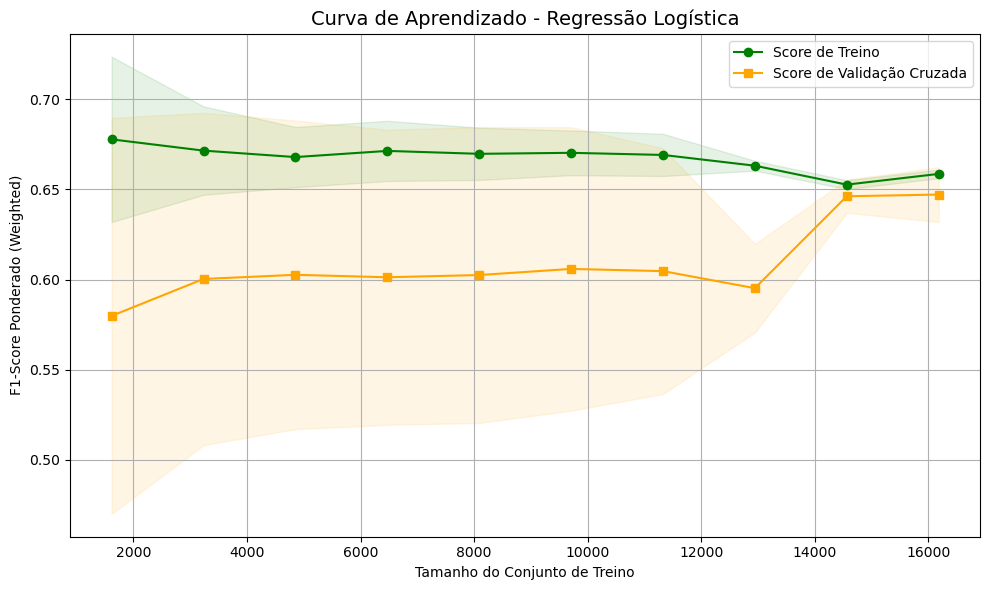

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

best_params_lr = grid_Regressao_Logistica.best_params_
model_lr = LogisticRegression(**best_params_lr, random_state=42, max_iter=5000)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_lr,
    X=X_train_scaled,
    y=y_train_resampled,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_mean, 'o-', color="green", label='Score de Treino')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="green")

plt.plot(train_sizes, test_mean, 's-', color="orange", label='Score de Validação Cruzada')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")

plt.title('Curva de Aprendizado - Regressão Logística', fontsize=14)
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score Ponderado (Weighted)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [193]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


svc = SVC(probability=True, random_state=42) 

param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [1, 10, 100],
        'gamma': ['scale', 0.1, 0.01]
    }
]


grid_SVM = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=3, 
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)



grid_SVM.fit(X_train_scaled, y_train_resampled)



print("\nBusca finalizada!")
print("Melhores parâmetros encontrados:", grid_SVM.best_params_)
print(f"Melhor score (f1_weighted) na validação cruzada: {grid_SVM.best_score_:.4f}")

y_pred_SVM = grid_SVM.predict(X_test_scaled)

print("\n--- Relatório de Classificação do Melhor Modelo SVM no Teste ---")
print(classification_report(y_test, y_pred_SVM, target_names=label_encoder.classes_))

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Busca finalizada!
Melhores parâmetros encontrados: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor score (f1_weighted) na validação cruzada: 0.7309

--- Relatório de Classificação do Melhor Modelo SVM no Teste ---
              precision    recall  f1-score   support

        Alto       0.57      0.62      0.60       758
       Baixo       0.84      0.84      0.84      1264
    Moderado       0.69      0.66      0.68      1258
  Muito Alto       0.60      0.58      0.59       263

    accuracy                           0.71      3543
   macro avg       0.68      0.68      0.68      3543
weighted avg       0.71      0.71      0.71      3543



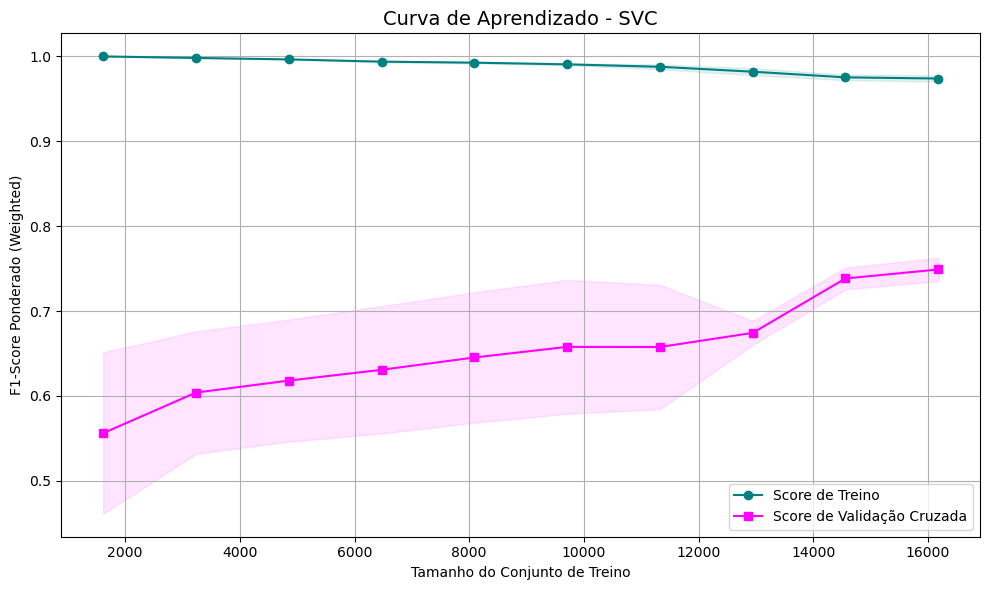

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

best_params_svc = grid_SVM.best_params_
model_svc = SVC(**best_params_svc, probability=True, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model_svc,
    X=X_train_scaled,
    y=y_train_resampled,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(train_sizes, train_mean, 'o-', color="teal", label='Score de Treino')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="teal")

plt.plot(train_sizes, test_mean, 's-', color="magenta", label='Score de Validação Cruzada')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="magenta")

plt.title('Curva de Aprendizado - SVC', fontsize=14)
plt.xlabel('Tamanho do Conjunto de Treino')
plt.ylabel('F1-Score Ponderado (Weighted)') 
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

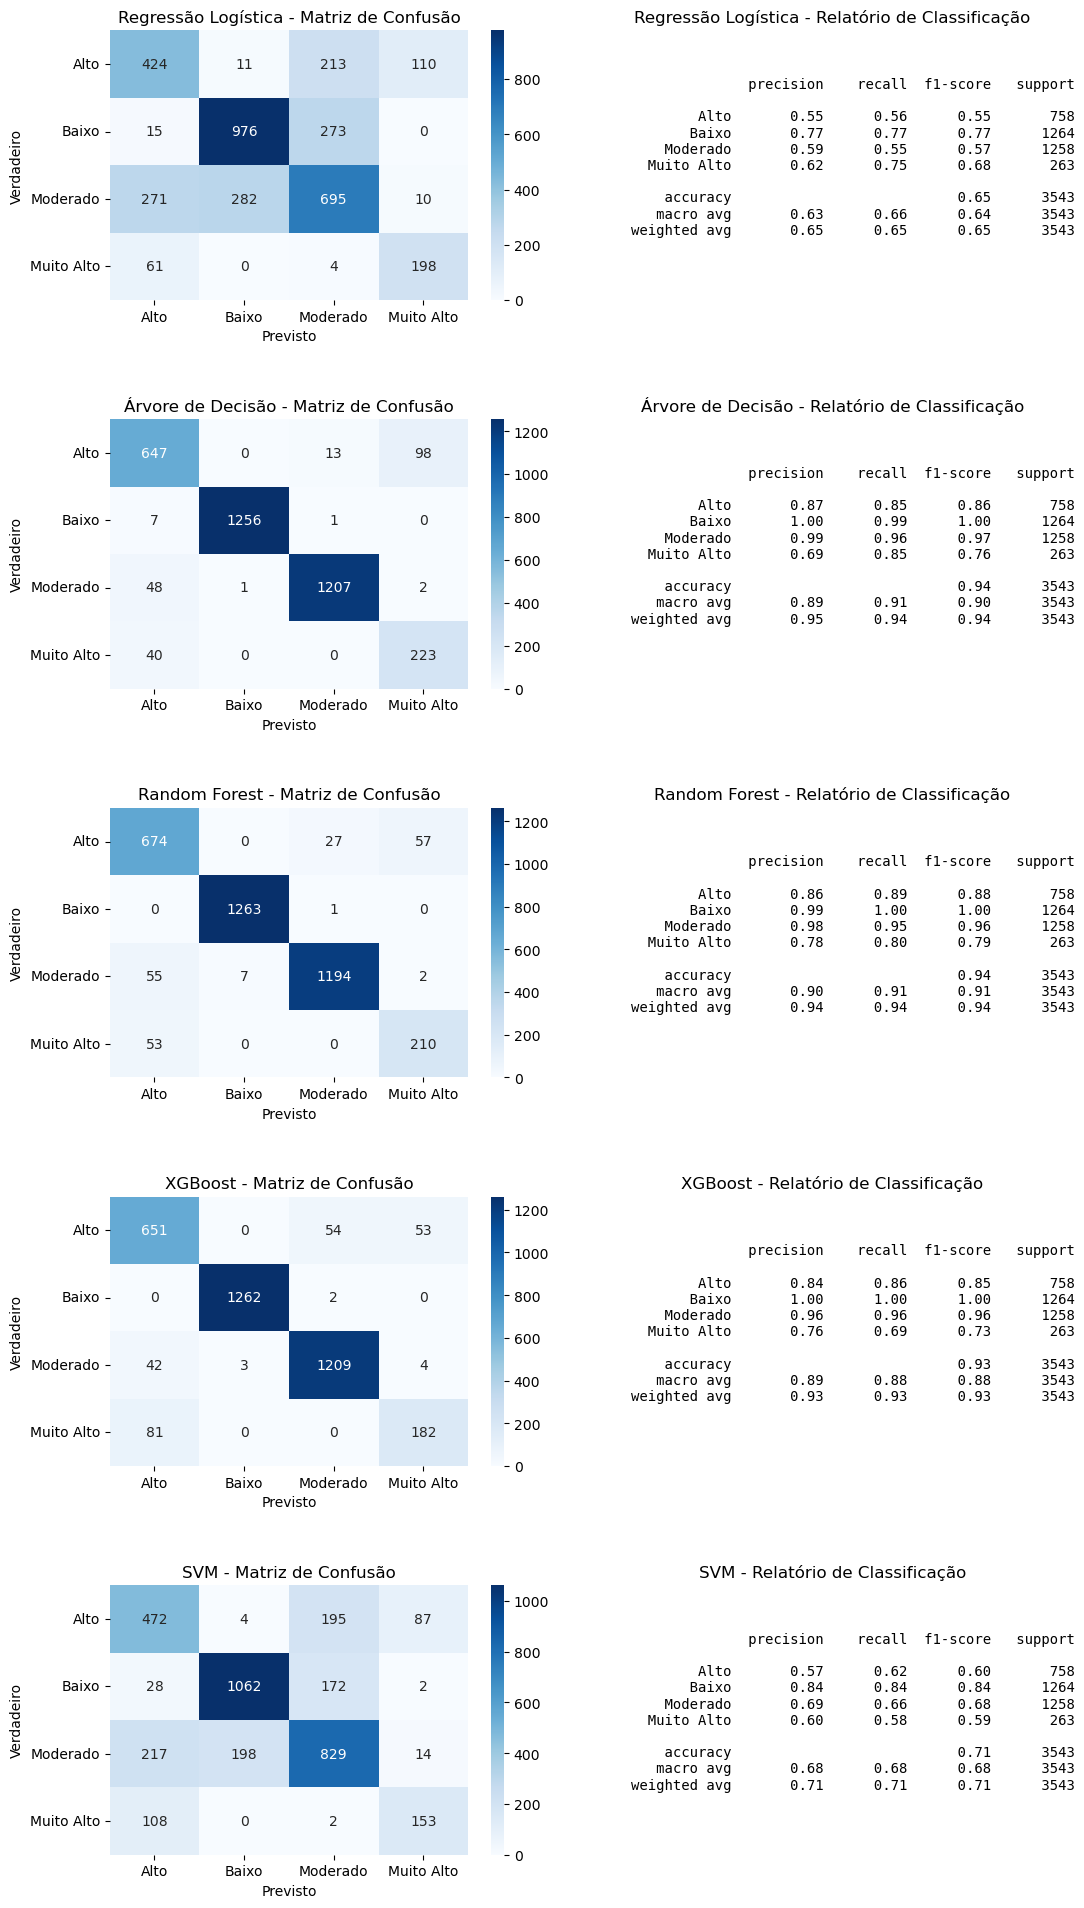

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

data = [
    (y_test, y_pred_Regressao_Logistica),
    (y_test, y_pred_Arvore_Decisao),
    (y_test, y_pred_Floresta_Aleatoria),
    (y_test, y_pred_xgboost),
    (y_test, y_pred_SVM)
]

model_labels = [
    'Regressão Logística',
    'Árvore de Decisão',
    'Random Forest',
    'XGBoost',
    'SVM' 
]


class_labels = label_encoder.classes_


fig, axes = plt.subplots(len(model_labels), 2, figsize=(12, 4 * len(model_labels)))


for i, ((y_true, y_pred), model_label) in enumerate(zip(data, model_labels)):
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0],
                xticklabels=class_labels, yticklabels=class_labels)
    axes[i, 0].set_title(f'{model_label} - Matriz de Confusão')
    axes[i, 0].set_ylabel('Verdadeiro')
    axes[i, 0].set_xlabel('Previsto')

    report = classification_report(y_true, y_pred, target_names=class_labels)
    
    axes[i, 1].text(0.05, 0.5, report, family='monospace', fontsize=10, va='center')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'{model_label} - Relatório de Classificação')

plt.tight_layout(pad=4.0)
plt.show()